Importing libraries

In [1]:
import pandas as pd
import numpy as np
pd.options.display.max_rows = 100
pd.options.display.max_columns = 100
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from sklearn import metrics
import os
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import PolynomialFeatures

# hide warnings
import warnings
warnings.filterwarnings('ignore')

# Reading the dataset

In [2]:
housing_orig_df = pd.read_csv(r"C:\Users\Kaveri Pradeep\Desktop\Micks\Advance LR Assignment\train.csv", encoding = 'utf-8')

In [3]:
housing_orig_df.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd       None   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   
3          ALQ         216          Unf           0        540          756   
4          GLQ         655          Unf           0        490         1145   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0         NaN   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1          Gd            

# Understanding data

In [4]:
# Checking rows and columns in data
housing_orig_df.shape

(1460, 81)

In [5]:
# Check for column details
housing_orig_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [6]:
# Checking basic stats of data
housing_orig_df.describe()

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726   
std       1.112799    30.202904     20.645407   181.066207   456.098091   
min       1.000000  1872.000000   1950.000000     0.000000     0.000000   
25%       5.000000  1954.000000   1967.000000     0.000000     0.000000   
50%       5.000000  1973.000000   1994.000000     0.000000   383.500000   
75%       6.000000  2000.000000   2004.000000   166.000000   712.250000   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000   

        BsmtFinSF2    BsmtUnfSF  TotalBsmtSF     1stFlrSF     2ndFlrSF  \
count  1460.000000  1460.000000  1460.000000  1460.000000  1460.000000   
mean     46.549315   567.240411  1057.429452  1162.626712   346.992466   
std     161.319273   441.866955   438.705324   386.587738   436.528436   
min       0.000000     0.000000     0.000000   334.000000     0.000000   
25%       0.000000   223.000000   795.750000   882.000000     0.000000   
50%       0.000000   477.500000   991.500000  1087.000000     0.000000   
75%       0.000000   808.000000  1298.250000  1391.250000   728.000000   
max    1474.000000  2336.000000  6110.000000  4692.000000  2065.000000   

       LowQualFinSF    GrLivArea  BsmtFullBath  BsmtHalfBath     FullBath  \
count   1460.000000  1460.000000   1460.000000   1460.000000  1460.000000   
mean       5.844521  1515.463699      0.425342      0.057534     1.565068   
std       48.623081   525.480383      0.518911      0.238753     0.550916   
min        0.000000   334.000000      0.000000      0.000000     0.000000   
25%        0.000000  1129.500000      0.000000      0.000000     1.000000   
50%        0.000000  1464.000000      0.000000      0.000000     2.000000   
75%        0.000000  1776.750000      1.000000      0.000000     2.000000   
max      572.000000  5642.000000      3.000000      2.000000     3.000000   

          HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd   Fireplaces  \
count  1460.000000   1460.000000   1460.000000   1460.000000  1460.000000   
mean      0.382877      2.866438      1.046575      6.517808     0.613014   
std       0.502885      0.815778      0.220338      1.625393     0.644666   
min       0.000000      0.000000      0.000000      2.000000     0.000000   
25%       0.000000      2.000000      1.000000      5.000000     0.000000   
50%       0.000000      3.000000      1.000000      6.000000     1.000000   
75%       1.000000      3.000000      1.000000      7.000000     1.000000   
max       2.000000      8.000000      3.000000     14.000000     3.000000   

       GarageYrBlt   GarageCars   GarageArea   WoodDeckSF  OpenPorchSF  \
count  1379.000000  1460.000000  1460.000000  1460.000000  1460.000000   
mean   1978.506164     1.767123   472.980137    94.244521    46.660274   
std      24.689725     0.747315   213.804841   125.338794    66.256028   
min    1900.000000     0.000000     0.000000     0.000000     0.000000   
25%    1961.000000     1.000000   334.500000     0.000000     0.000000   
50%    1980.000000     2.000000   480.000000     0.000000    25.000000   
75%    2002.000000     2.000000   576.000000   168.000000    68.000000   
max    2

In [7]:
# Checking any dulicates exist in data
sum(housing_orig_df.duplicated(subset = 'Id')) == 0

True

In [8]:
# checking null records
round(100*(housing_orig_df.isnull().sum()/len(housing_orig_df.index)), 2)

Id                0.00
MSSubClass        0.00
MSZoning          0.00
LotFrontage      17.74
LotArea           0.00
Street            0.00
Alley            93.77
LotShape          0.00
LandContour       0.00
Utilities         0.00
LotConfig         0.00
LandSlope         0.00
Neighborhood      0.00
Condition1        0.00
Condition2        0.00
BldgType          0.00
HouseStyle        0.00
OverallQual       0.00
OverallCond       0.00
YearBuilt         0.00
YearRemodAdd      0.00
RoofStyle         0.00
RoofMatl          0.00
Exterior1st       0.00
Exterior2nd       0.00
MasVnrType        0.55
MasVnrArea        0.55
ExterQual         0.00
ExterCond         0.00
Foundation        0.00
BsmtQual          2.53
BsmtCond          2.53
BsmtExposure      2.60
BsmtFinType1      2.53
BsmtFinSF1        0.00
BsmtFinType2      2.60
BsmtFinSF2        0.00
BsmtUnfSF         0.00
TotalBsmtSF       0.00
Heating           0.00
HeatingQC         0.00
CentralAir        0.00
Electrical        0.07
1stFlrSF   

In [9]:
# grouping high null records
housing_orig_df.columns[housing_orig_df.isnull().any()] 

null = housing_orig_df.isnull().sum()/len(housing_orig_df)*100
null = null[null>0]
null.sort_values(inplace=True, ascending=False)
null

PoolQC          99.520548
MiscFeature     96.301370
Alley           93.767123
Fence           80.753425
FireplaceQu     47.260274
LotFrontage     17.739726
GarageType       5.547945
GarageYrBlt      5.547945
GarageFinish     5.547945
GarageQual       5.547945
GarageCond       5.547945
BsmtExposure     2.602740
BsmtFinType2     2.602740
BsmtFinType1     2.534247
BsmtCond         2.534247
BsmtQual         2.534247
MasVnrArea       0.547945
MasVnrType       0.547945
Electrical       0.068493
dtype: float64

Since, these variables designates facility and it might have impact on prices. So, proceeding with imputing values.

In [10]:
# Imputing categorical variables with 'None'
null_with_meaning = ["Alley", "MasVnrType", "BsmtQual", "BsmtCond", "BsmtExposure", "BsmtFinType1", "BsmtFinType2", "FireplaceQu", "GarageType", "GarageFinish", "GarageQual", "GarageCond", "PoolQC", "Fence", "MiscFeature"]
for i in null_with_meaning:
    housing_orig_df[i].fillna("none", inplace=True)

In [11]:
# Checking nulls once again

housing_orig_df.columns[housing_orig_df.isnull().any()] 

null_2 = housing_orig_df.isnull().sum()/len(housing_orig_df)*100
null_2 = null_2[null_2>0]
null_2.sort_values(inplace=True, ascending=False)
null_2

LotFrontage    17.739726
GarageYrBlt     5.547945
MasVnrArea      0.547945
Electrical      0.068493
dtype: float64

In [12]:
# Checking these variables individually
col_list = ["LotFrontage", "GarageYrBlt", "MasVnrArea", "Electrical"]
for col in col_list:
    print(housing_orig_df[col].describe())

count    1201.000000
mean       70.049958
std        24.284752
min        21.000000
25%        59.000000
50%        69.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64
count    1379.000000
mean     1978.506164
std        24.689725
min      1900.000000
25%      1961.000000
50%      1980.000000
75%      2002.000000
max      2010.000000
Name: GarageYrBlt, dtype: float64
count    1452.000000
mean      103.685262
std       181.066207
min         0.000000
25%         0.000000
50%         0.000000
75%       166.000000
max      1600.000000
Name: MasVnrArea, dtype: float64
count      1459
unique        5
top       SBrkr
freq       1334
Name: Electrical, dtype: object


In [13]:
# As per the data dictionary "LotFrontage" is Linear feet of street connected to property.  
# Since it is a numeric with a fair distribution, imputing it with similar 'Neighborhood' values

housing_orig_df['LotFrontage'] = housing_orig_df.groupby("Neighborhood")["LotFrontage"].transform(lambda x: x.fillna(x.median()))
housing_orig_df["GarageYrBlt"].fillna(housing_orig_df["GarageYrBlt"].median(), inplace=True)
housing_orig_df["MasVnrArea"].fillna(housing_orig_df["MasVnrArea"].median(), inplace=True)
housing_orig_df["Electrical"].dropna(inplace=True)

In [14]:
# Checking these variables individually
col_list = ["LotFrontage", "GarageYrBlt", "MasVnrArea", "Electrical"]
for col in col_list:
    print(housing_orig_df[col].describe())

count    1460.000000
mean       70.199658
std        22.431902
min        21.000000
25%        60.000000
50%        70.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64
count    1460.000000
mean     1978.589041
std        23.997022
min      1900.000000
25%      1962.000000
50%      1980.000000
75%      2001.000000
max      2010.000000
Name: GarageYrBlt, dtype: float64
count    1460.000000
mean      103.117123
std       180.731373
min         0.000000
25%         0.000000
50%         0.000000
75%       164.250000
max      1600.000000
Name: MasVnrArea, dtype: float64
count      1459
unique        5
top       SBrkr
freq       1334
Name: Electrical, dtype: object


# EDA on cleaned data

In [15]:
# Checking numerical variables in dataset
numeric_data = housing_orig_df.select_dtypes(include=['float64', 'int64'])
numeric_data.head()

Id  MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
0   1          60         65.0     8450            7            5       2003   
1   2          20         80.0     9600            6            8       1976   
2   3          60         68.0    11250            7            5       2001   
3   4          70         60.0     9550            7            5       1915   
4   5          60         84.0    14260            8            5       2000   

   YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          2003       196.0         706           0        150          856   
1          1976         0.0         978           0        284         1262   
2          2002       162.0         486           0        434          920   
3          1970         0.0         216           0        540          756   
4          2000       350.0         655           0        490         1145   

   1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  \
0       856       854             0       1710             1             0   
1      1262         0             0       1262             0             1   
2       920       866             0       1786             1             0   
3       961       756             0       1717             1             0   
4      1145      1053             0       2198             1             0   

   FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  Fireplaces  \
0         2         1             3             1             8           0   
1         2         0             3             1             6           1   
2         2         1             3             1             6           1   
3         1         0             3             1             7           1   
4         2         1             4             1             9           1   

   GarageYrBlt  GarageCars  GarageArea  WoodDeckSF  OpenPorchSF  \
0       2003.0           2         548           0           61   
1       1976.0           2         460         298            0   
2       2001.0           2         608           0           42   
3       1998.0           3         642           0           35   
4       2000.0           3         836         192           84   

   EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  MoSold  YrSold  \
0              0          0            0         0        0       2    2008   
1              0          0            0         0        0       5    2007   
2              0          0            0         0        0       9    2008   
3            272          0            0         0        0       2    2006   
4              0          0            0         0        0      12    2008   

   SalePrice  
0     208500  
1     181500  
2     223500  
3     140000  
4     250000

In [16]:
# Dropping ID column
numeric_data = numeric_data.drop(["Id"], axis=1)
numeric_data

MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
0             60         65.0     8450            7            5       2003   
1             20         80.0     9600            6            8       1976   
2             60         68.0    11250            7            5       2001   
3             70         60.0     9550            7            5       1915   
4             60         84.0    14260            8            5       2000   
...          ...          ...      ...          ...          ...        ...   
1455          60         62.0     7917            6            5       1999   
1456          20         85.0    13175            6            6       1978   
1457          70         66.0     9042            7            9       1941   
1458          20         68.0     9717            5            6       1950   
1459          20         75.0     9937            5            6       1965   

      YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  \
0             2003       196.0         706           0        150   
1             1976         0.0         978           0        284   
2             2002       162.0         486           0        434   
3             1970         0.0         216           0        540   
4             2000       350.0         655           0        490   
...            ...         ...         ...         ...        ...   
1455          2000         0.0           0           0        953   
1456          1988       119.0         790         163        589   
1457          2006         0.0         275           0        877   
1458          1996         0.0          49        1029          0   
1459          1965         0.0         830         290        136   

      TotalBsmtSF  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  \
0             856       856       854             0       1710             1   
1            1262      1262         0             0       1262             0   
2             920       920       866             0       1786             1   
3             756       961       756             0       1717             1   
4            1145      1145      1053             0       2198             1   
...           ...       ...       ...           ...        ...           ...   
1455          953       953       694             0       1647             0   
1456         1542      2073         0             0       2073             1   
1457         1152      1188      1152             0       2340             0   
1458         1078      1078         0             0       1078             1   
1459         1256      1256         0             0       1256             1   

      BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  \
0                0         2         1             3             1   
1                1         2         0             3             1   
2                0         2         1             3             1   
3                0         1         0             3             1   
4                0         2         1             4             1   
...            ...       ...       ...           ...           ...   
1455             0         2         1             3             1   
1456             0         2         0             3             1   
1457             0         2         0             4             1   
1458             0         1         0             2             1   
1459             0         1         1             3             1   

      TotRmsAbvGrd  Fireplaces  GarageYrBlt  GarageCars  GarageArea  \
0                8           0       2003.0           2         548   
1                6           1       1976.0           2         460   
2                6           1       2001.0           2         608   
3                7           1       1998.0           3         642   
4                9           1       2000.0           3         836   


Analysing Target Variable "SalePrice" with other columns

In [17]:
col_list = ["Neighborhood", "OverallCond", "OverallQual"]

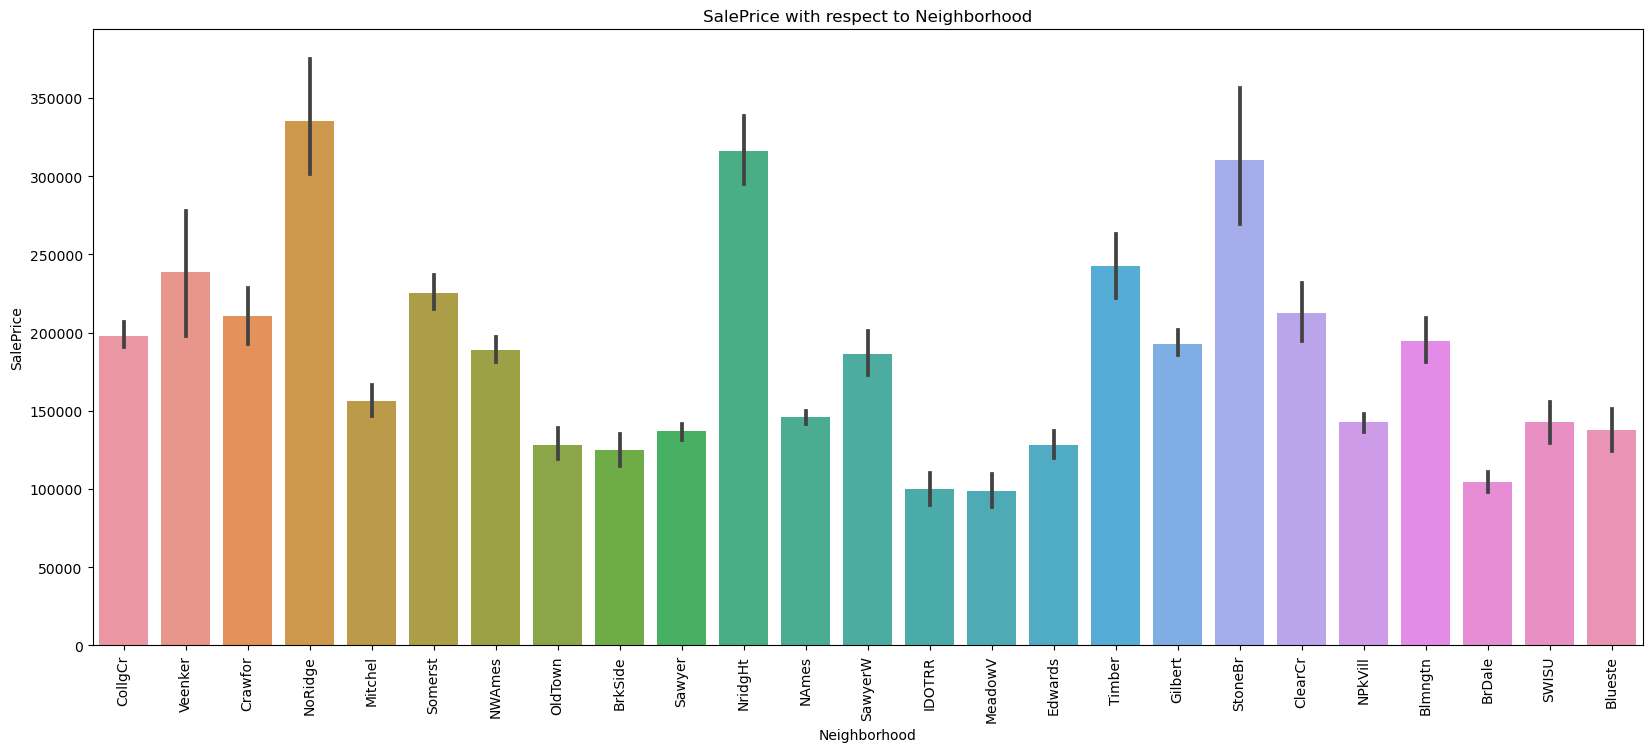

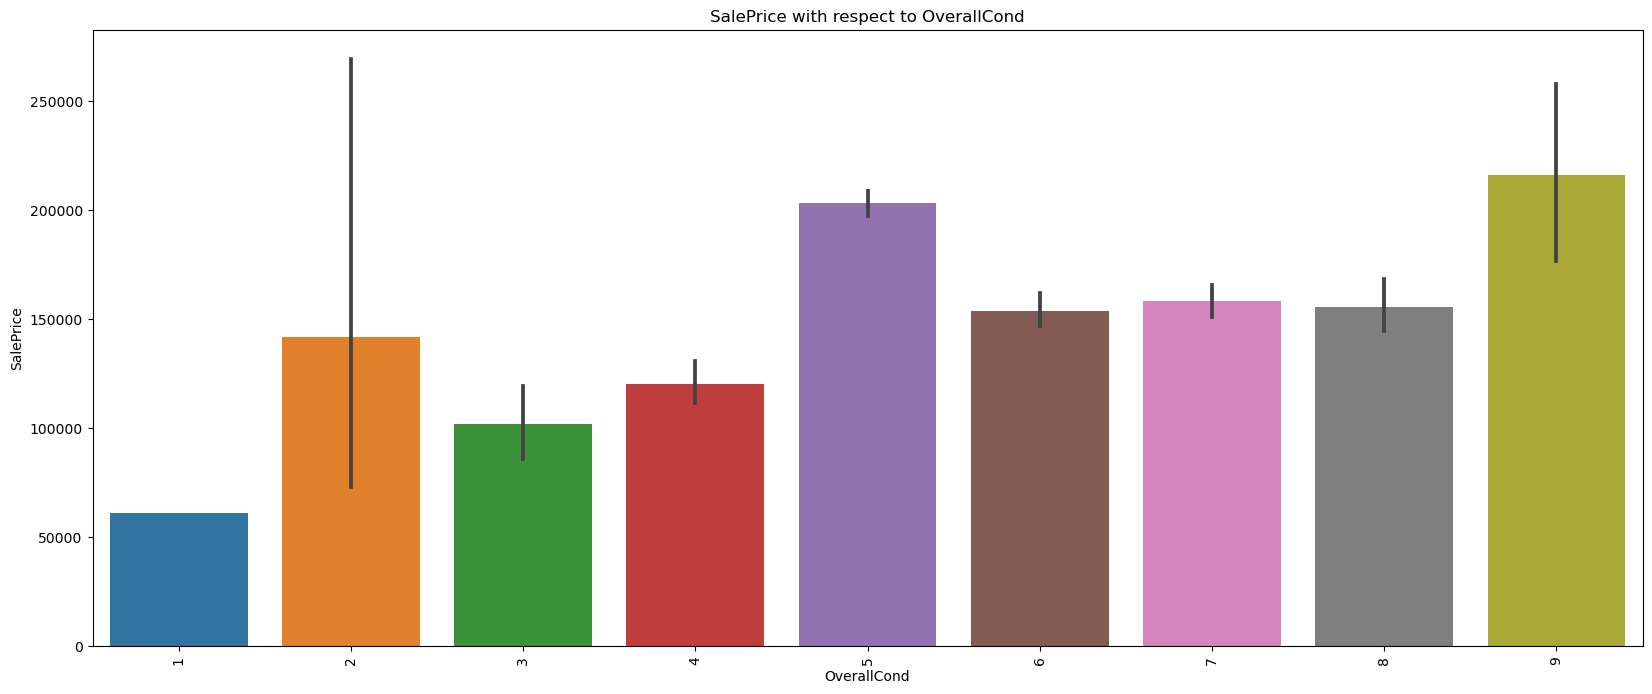

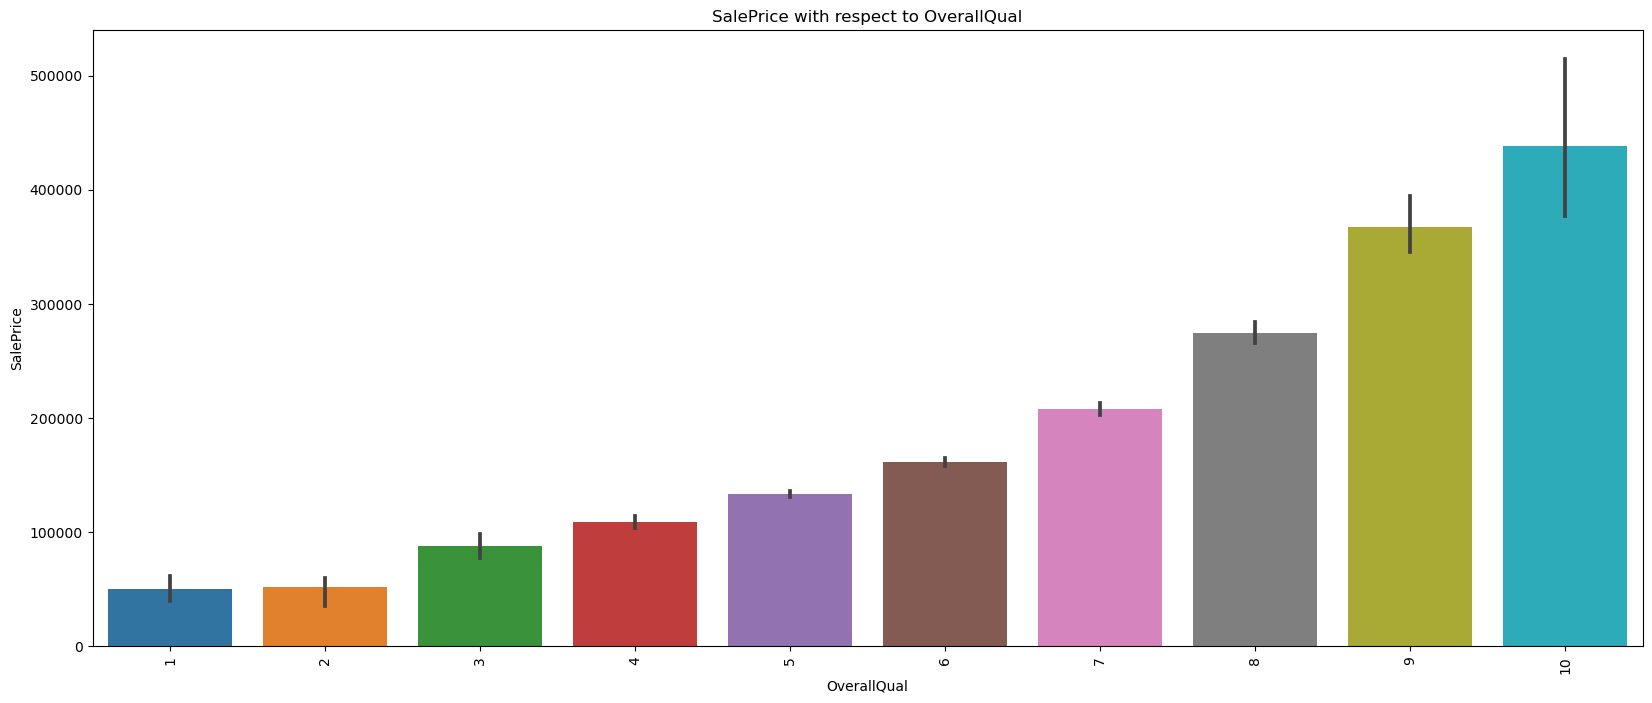

In [18]:
for cols in col_list:
    plt.figure(figsize=(20,8))
    sns.barplot(x=cols, y="SalePrice", data = housing_orig_df)
    plt.title("SalePrice with respect to "+ cols)
    plt.xticks(rotation=90)

**Interpretaion:**
    
    - Neighbourhood with Price chart: Some of the neighbourhood are priced high than others. Such as NoRidge,NridghtStonerBr.
    - OverallCond with Price Chart: Poor, average and Excellent condition houses were priced higher
    - OverallQual with Price Chart: Houses with good material and finish were priced higher.

<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

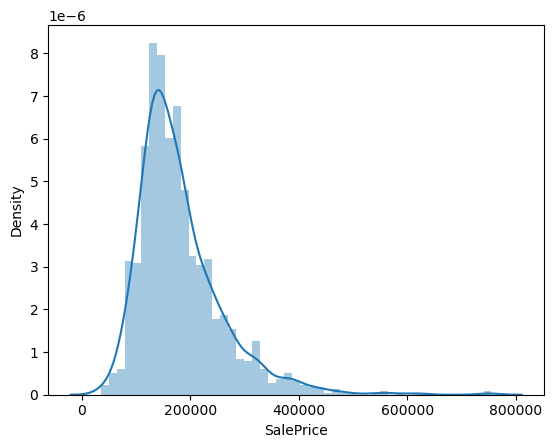

In [19]:
# Studying distribution of target variable "SalePrice"
sns.distplot(housing_orig_df["SalePrice"])

**Interpretaion:**

SalePrice data is left skewed. Hence, applying Log Transformations.

<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

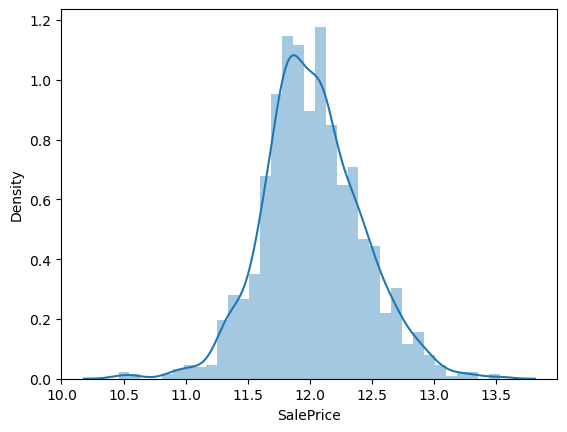

In [20]:
housing_orig_df['SalePrice']=np.log1p(housing_orig_df['SalePrice'])
sns.distplot(housing_orig_df["SalePrice"])

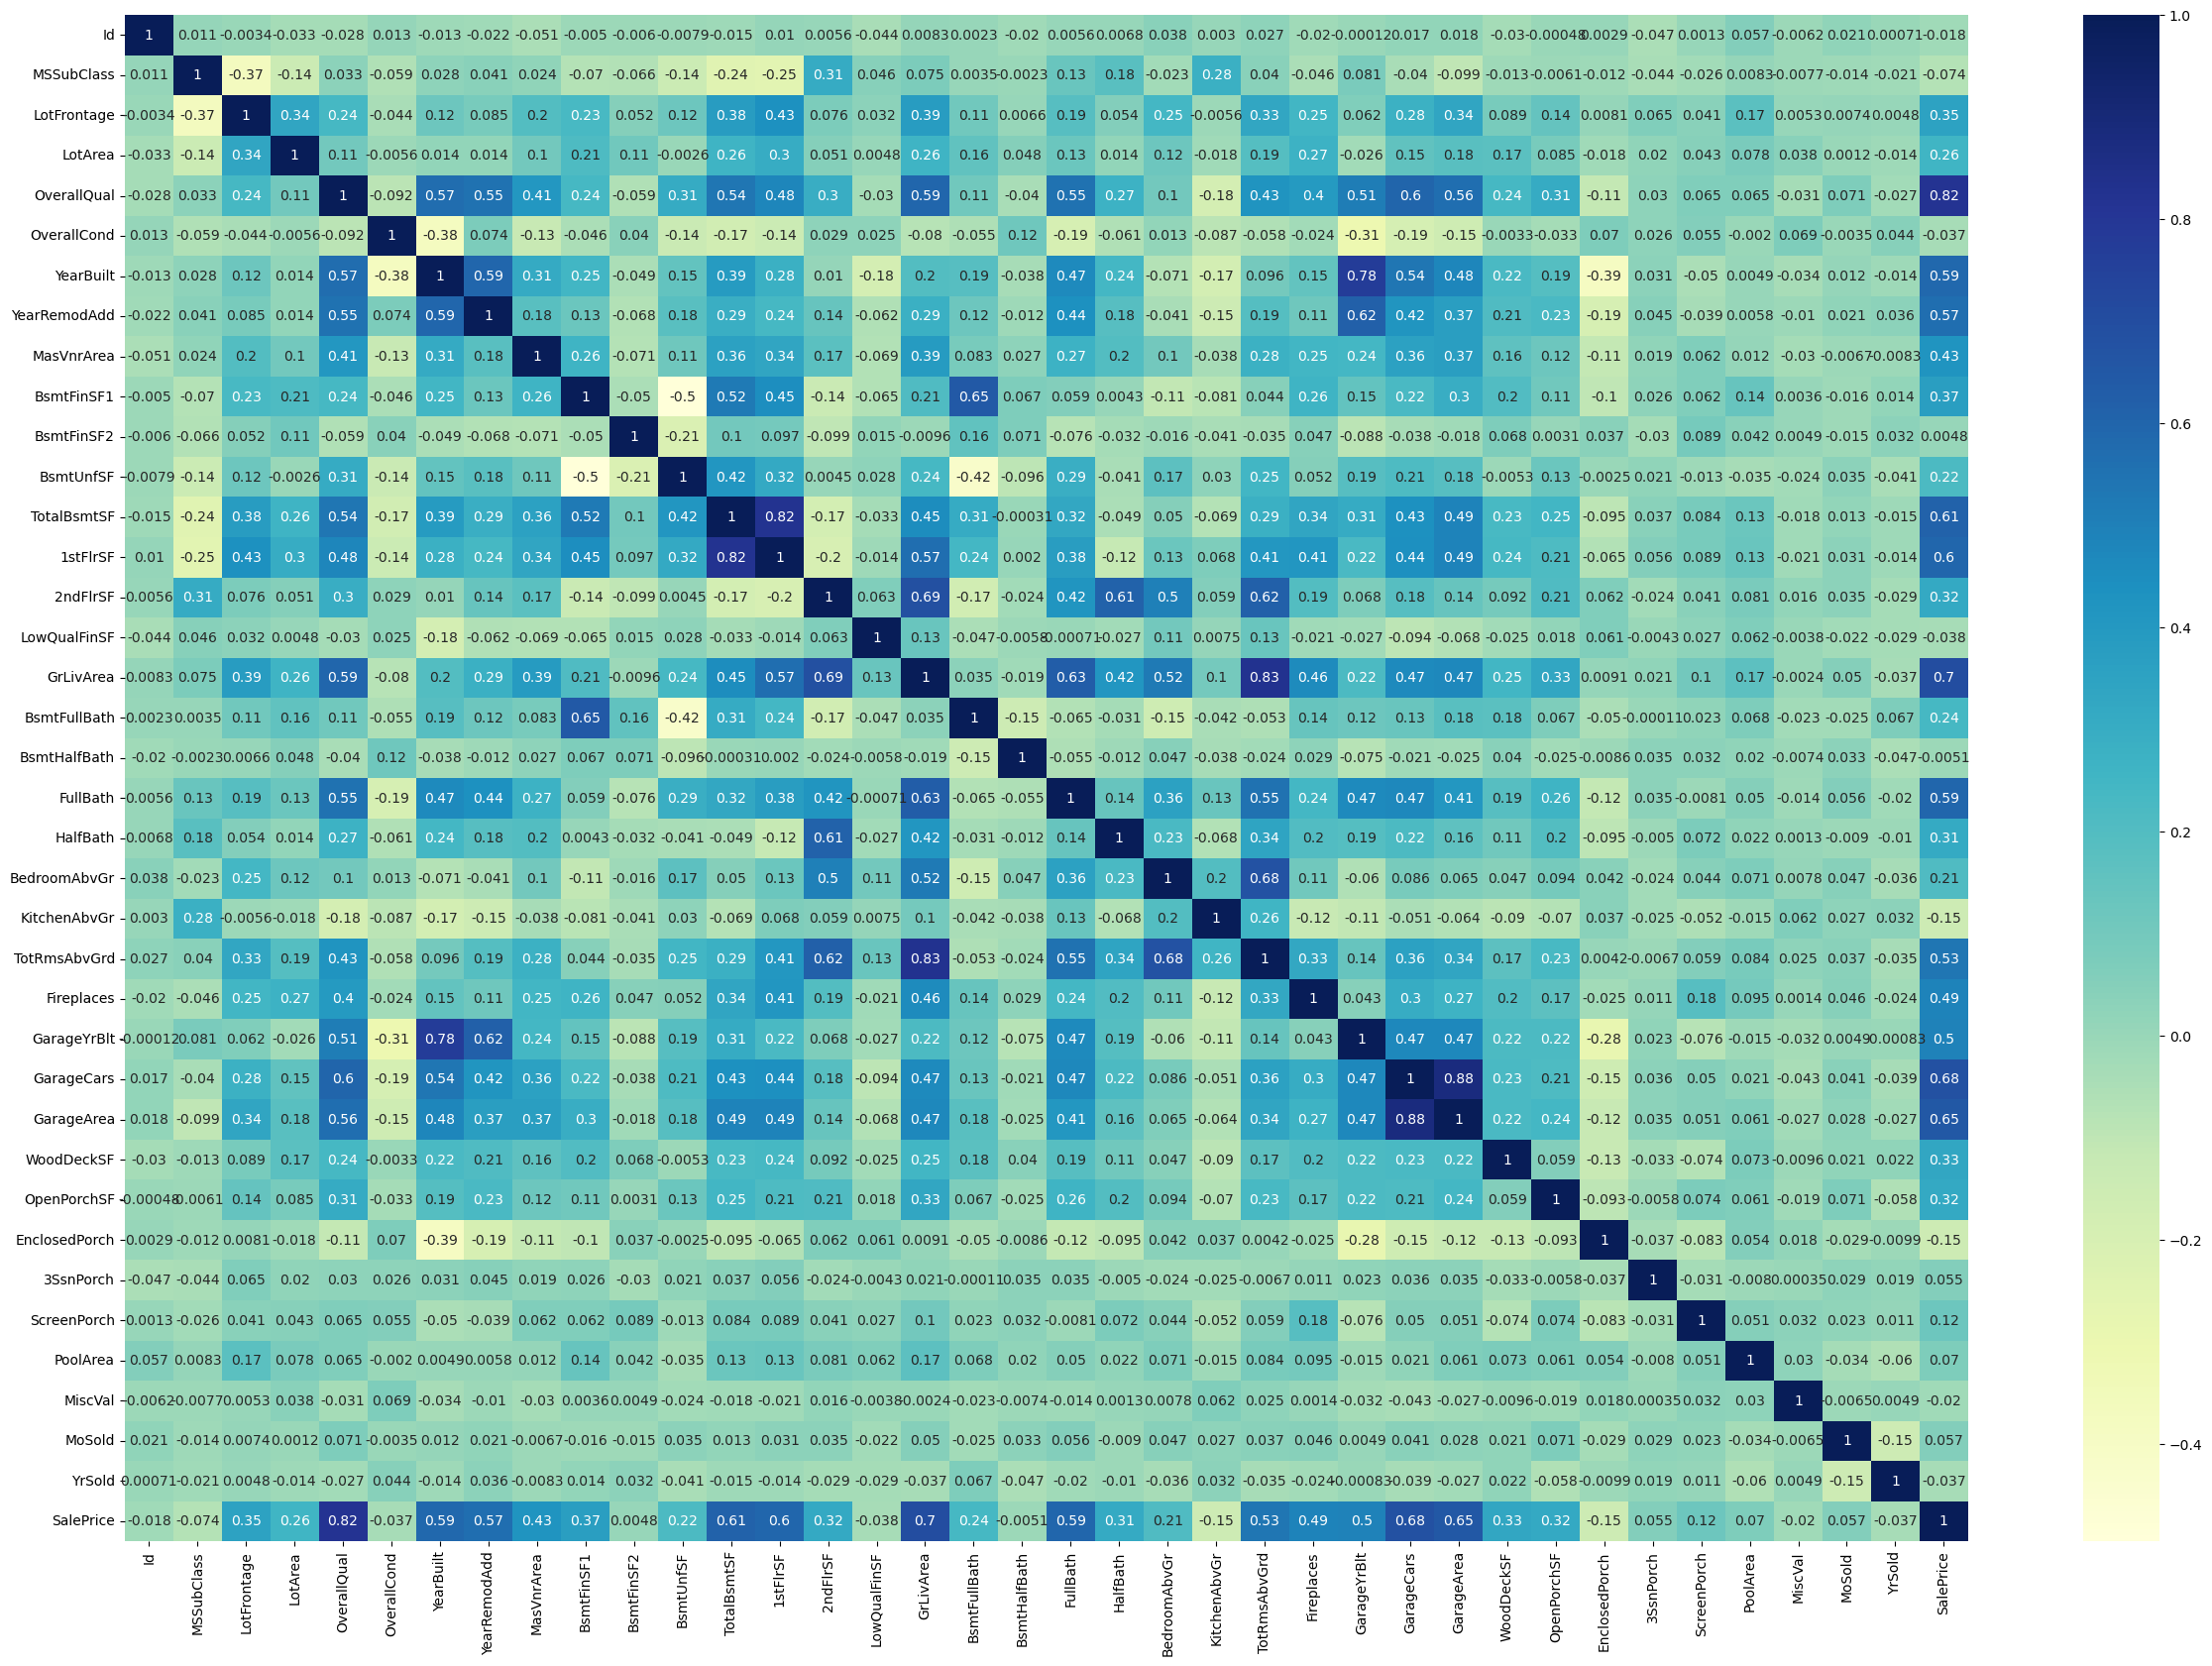

In [21]:
# Plotting correlation matrix
# figure size
plt.figure(figsize=(30,20))

sns.heatmap(housing_orig_df.corr(), cmap="YlGnBu", annot=True)
plt.show()

**Interpretation:**
    
    GarageYrBlt and YearBuilt have high correlation of 78%
    GarageCars and GarageArea has high correlation of 88%
    SalePrice and OverallCond has high correlation of 82%
    SalePrice and GrLivArea has high correlation of 82%
    TotRmsAbvGrt and GrLivArea has high correlation of 83%
    1stFlrSF and TotalBsmtSF has high correlation of 82%
    SalePrice and OverallQual has high correlation of 82%

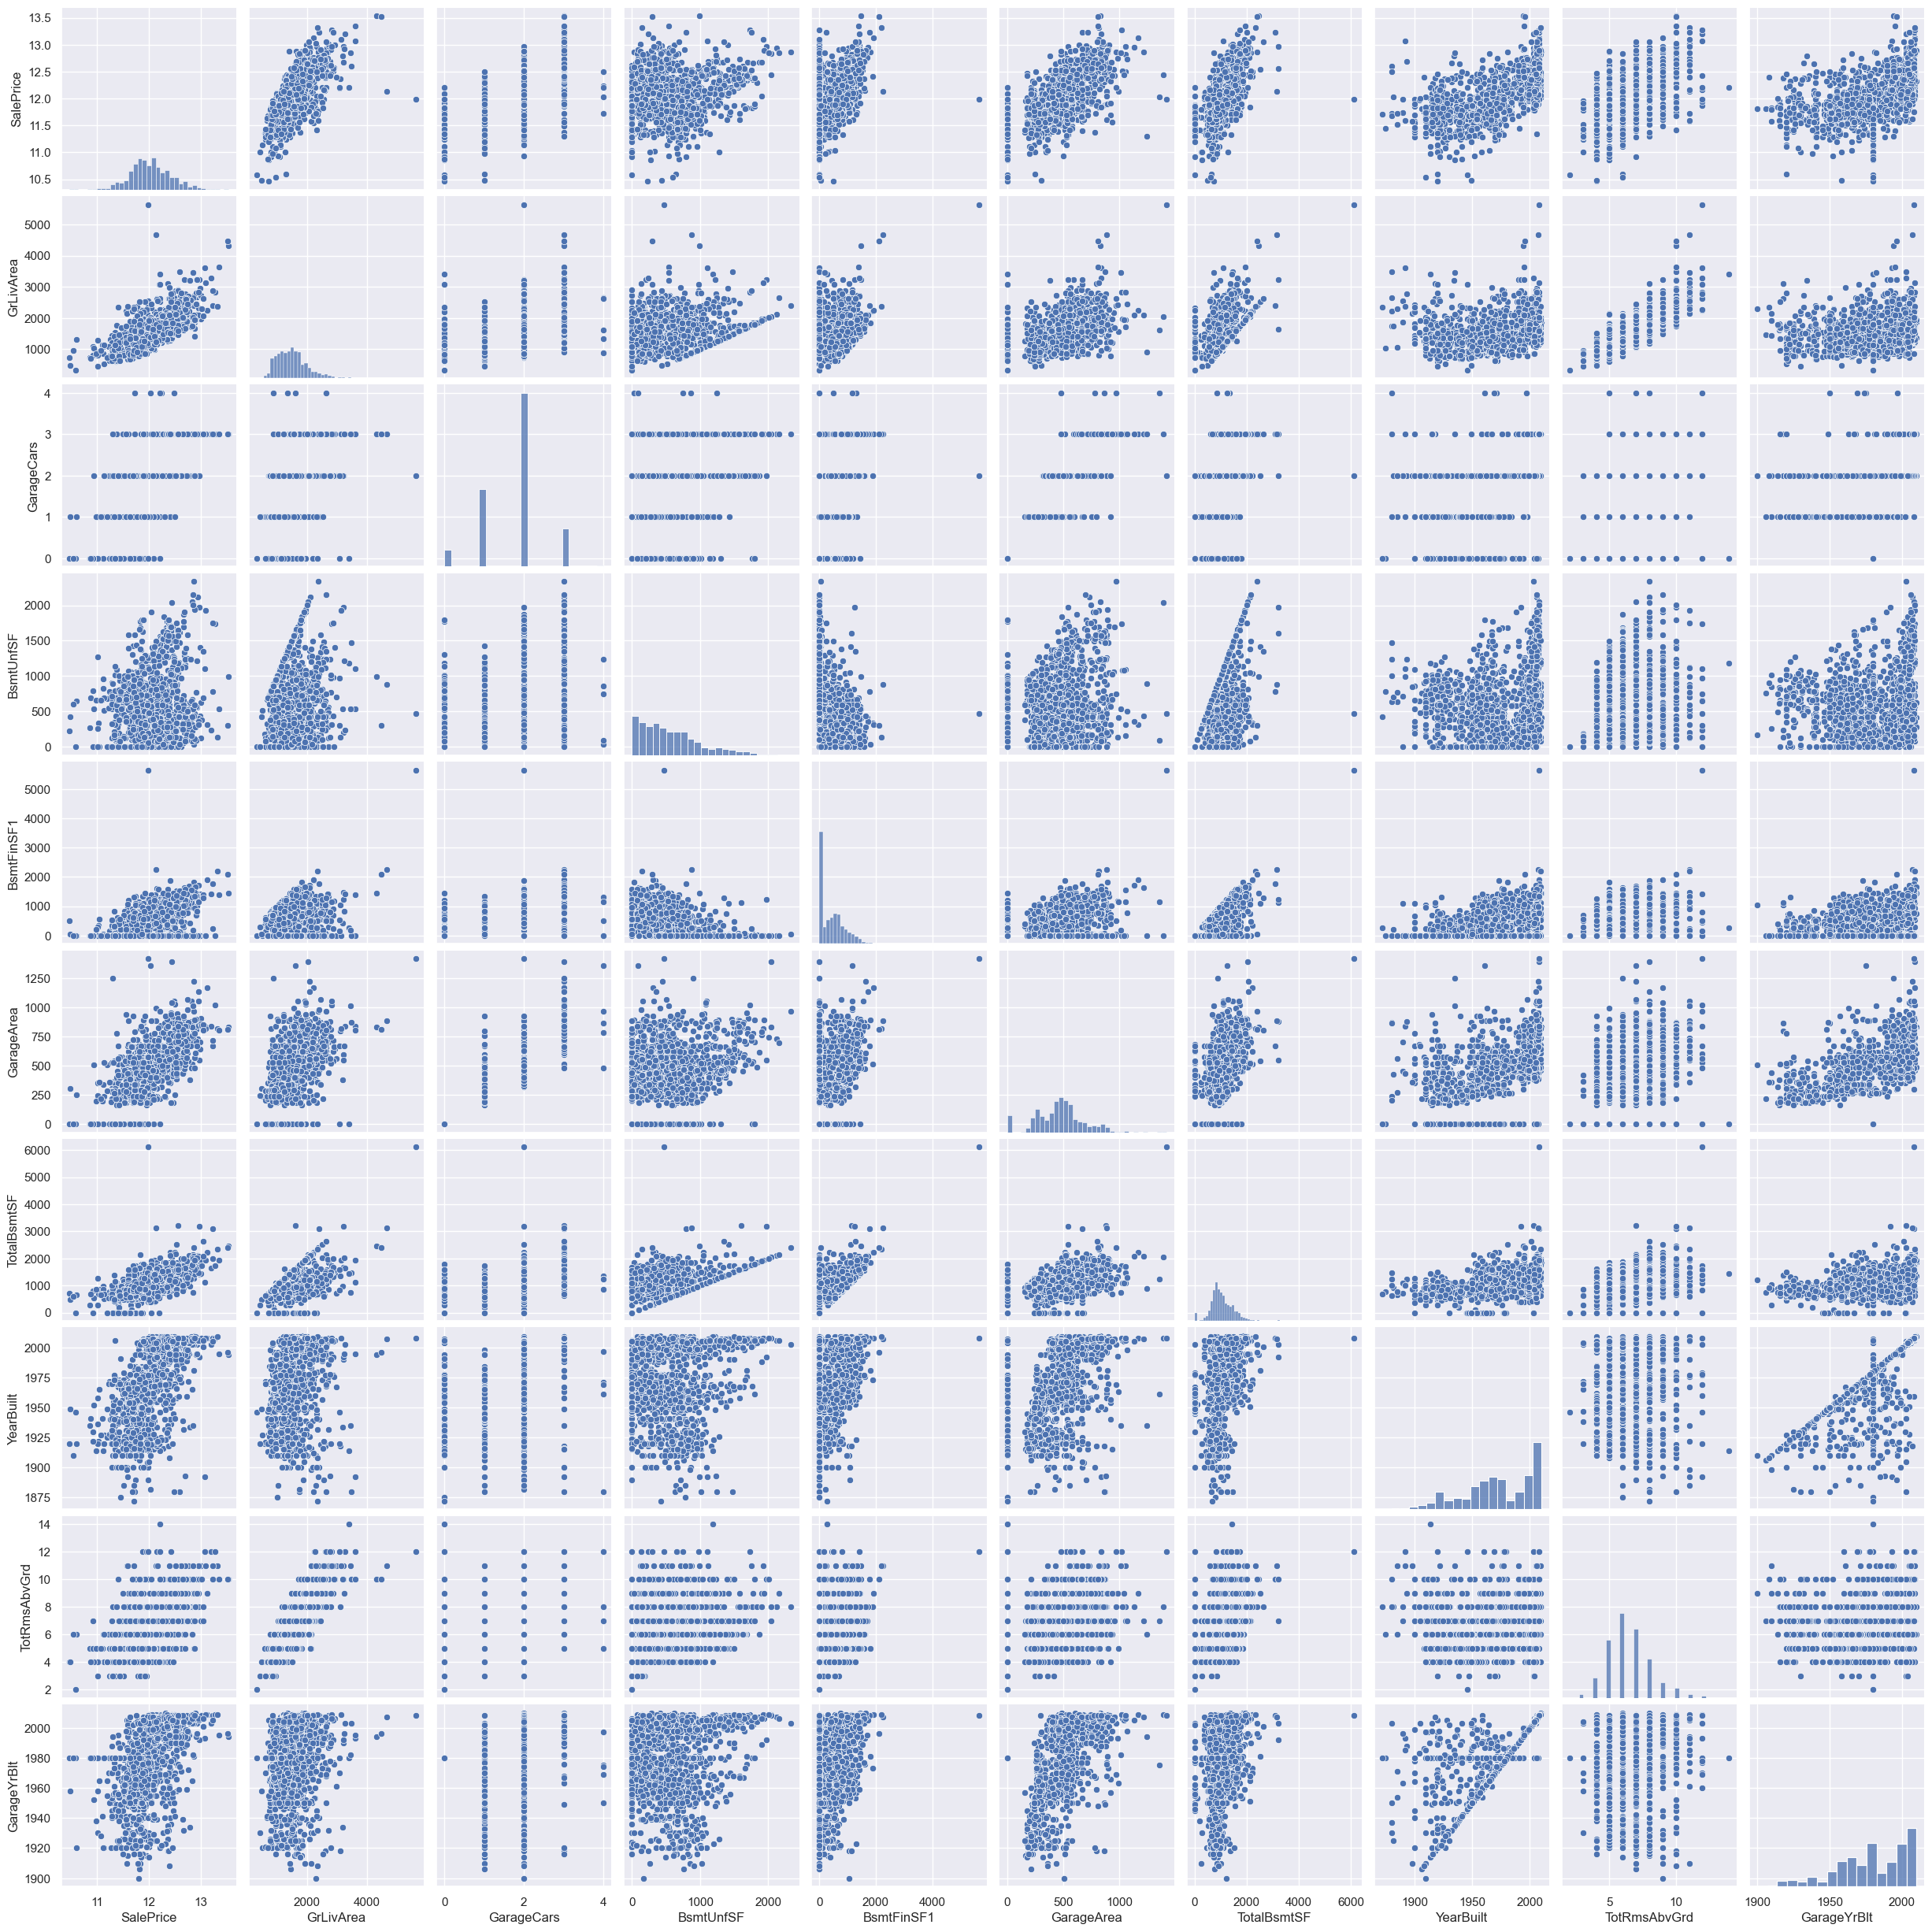

In [22]:
# Checking predictive power of high correlated variables
sns.set()
cols = ['SalePrice', 'GrLivArea', 'GarageCars', 'BsmtUnfSF', 'BsmtFinSF1', 'GarageArea', 'TotalBsmtSF', 'YearBuilt', 'TotRmsAbvGrd', 'GarageYrBlt']
sns.pairplot(housing_orig_df[cols], size = 2.5)
plt.show()

Dropping columns that are correlated and not contributing to SalePriced i.e. GarageCars, BsmtUnfSF, TotRmsAbvGrd, GarageYrBlt

In [23]:
# housing_orig_df.shape

In [24]:
cols_to_drop = ["GarageCars", "BsmtUnfSF", "TotRmsAbvGrd", "GarageYrBlt"]
for cols in cols_to_drop:
    housing_orig_df = housing_orig_df.drop([cols], axis=1)

In [25]:
# housing_orig_df.shape

In [26]:
#Numeric columns
housing_orig_df.select_dtypes(exclude=['object'])

Id  MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  \
0        1          60         65.0     8450            7            5   
1        2          20         80.0     9600            6            8   
2        3          60         68.0    11250            7            5   
3        4          70         60.0     9550            7            5   
4        5          60         84.0    14260            8            5   
...    ...         ...          ...      ...          ...          ...   
1455  1456          60         62.0     7917            6            5   
1456  1457          20         85.0    13175            6            6   
1457  1458          70         66.0     9042            7            9   
1458  1459          20         68.0     9717            5            6   
1459  1460          20         75.0     9937            5            6   

      YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  \
0          2003          2003       196.0         706           0   
1          1976          1976         0.0         978           0   
2          2001          2002       162.0         486           0   
3          1915          1970         0.0         216           0   
4          2000          2000       350.0         655           0   
...         ...           ...         ...         ...         ...   
1455       1999          2000         0.0           0           0   
1456       1978          1988       119.0         790         163   
1457       1941          2006         0.0         275           0   
1458       1950          1996         0.0          49        1029   
1459       1965          1965         0.0         830         290   

      TotalBsmtSF  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  \
0             856       856       854             0       1710             1   
1            1262      1262         0             0       1262             0   
2             920       920       866             0       1786             1   
3             756       961       756             0       1717             1   
4            1145      1145      1053             0       2198             1   
...           ...       ...       ...           ...        ...           ...   
1455          953       953       694             0       1647             0   
1456         1542      2073         0             0       2073             1   
1457         1152      1188      1152             0       2340             0   
1458         1078      1078         0             0       1078             1   
1459         1256      1256         0             0       1256             1   

      BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  \
0                0         2         1             3             1   
1                1         2         0             3             1   
2                0         2         1             3             1   
3                0         1         0             3             1   
4                0         2         1             4             1   
...            ...       ...       ...           ...           ...   
1455             0         2         1             3             1   
1456             0         2         0             3             1   
1457             0         2         0             4             1   
1458             0         1         0             2             1   
1459             0         1         1             3             1   

      Fireplaces  GarageArea  WoodDeckSF  OpenPorchSF  EnclosedPorch  \
0              0         548           0           61              0   
1              1         460         298            0              0   
2              1         608           0           42              0   
3              1         642           0           35            272   
4              1         836         192           84              0   
...          ...         ...         ...          ...   

Analyzing numeric columns such as GrLivArea, LotFrontage, LotArea, 1stFlrSF, 2ndFlrSF, OverallQual, OverallCond

In [27]:
def remove_outliers(x,y):
    q1 = x[y].quantile(0.25)
    q3 = x[y].quantile(0.75)
    value = q3-q1
    lower_value  = q1-1.5*value
    higer_value = q3+1.5*value
    out= x[(x[y]<higer_value) & (x[y]>lower_value)]
    return out

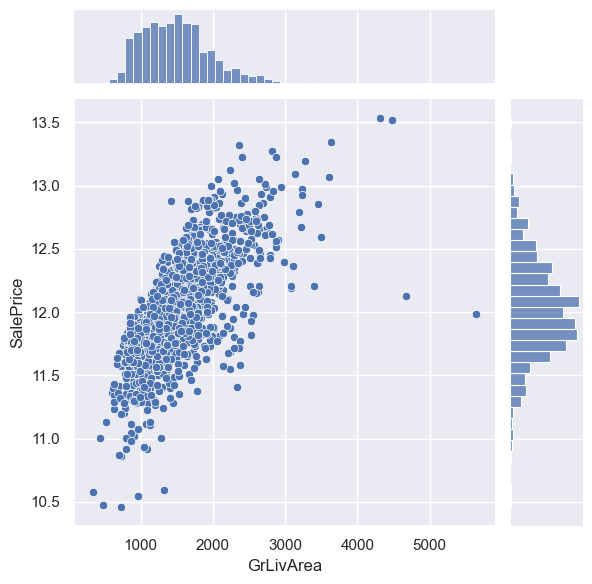

In [28]:
sns.jointplot(x=housing_orig_df["GrLivArea"], y = housing_orig_df['SalePrice'])

In [29]:
# Removing some outliers on lower right side of 'GrLivArea'
housing_orig_df = remove_outliers(housing_orig_df,'GrLivArea')

In [30]:
housing_orig_df.shape

(1429, 77)

Data is small hence, not removing outliers

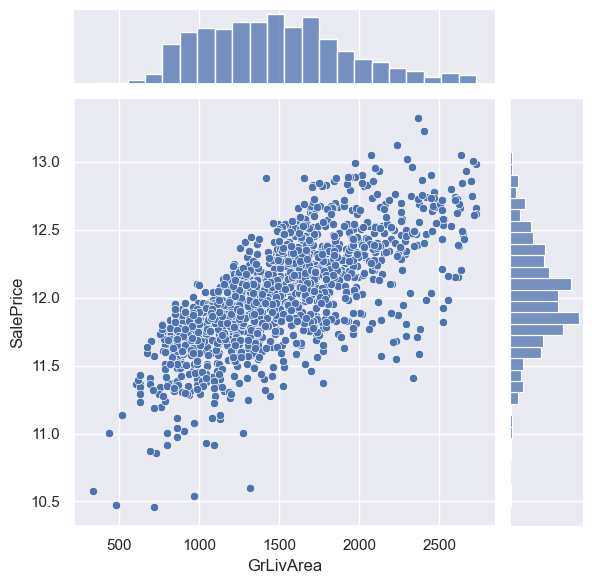

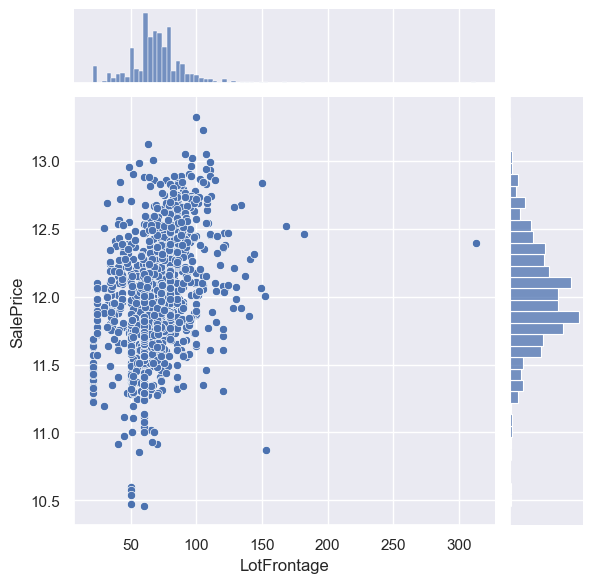

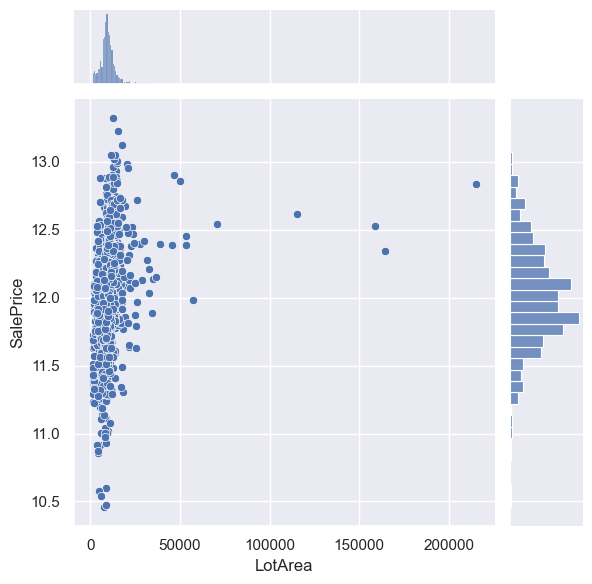

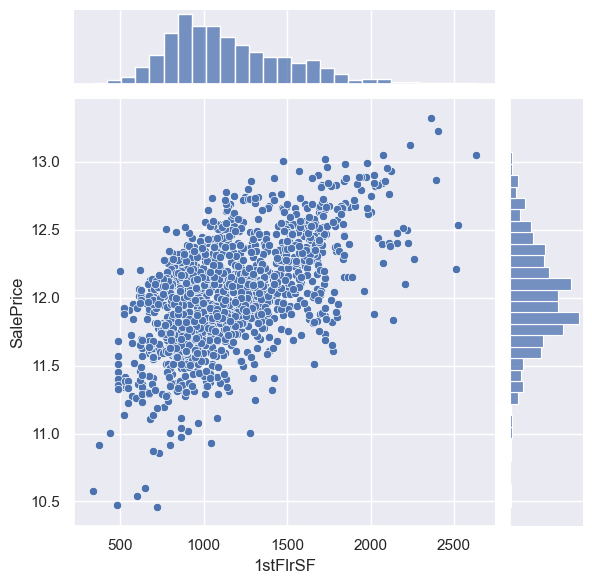

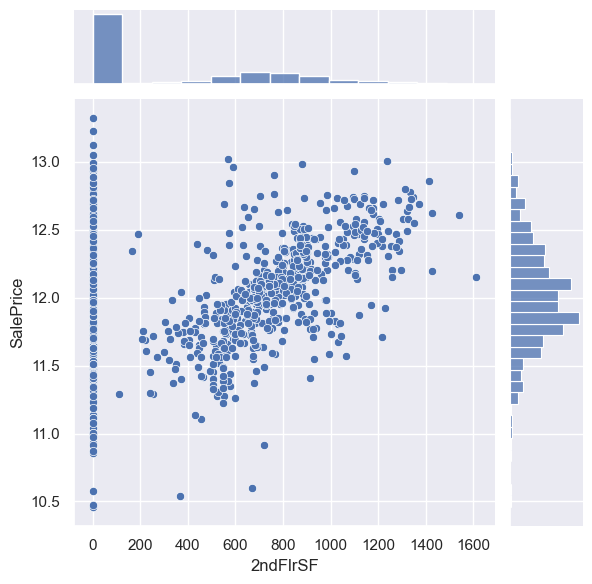

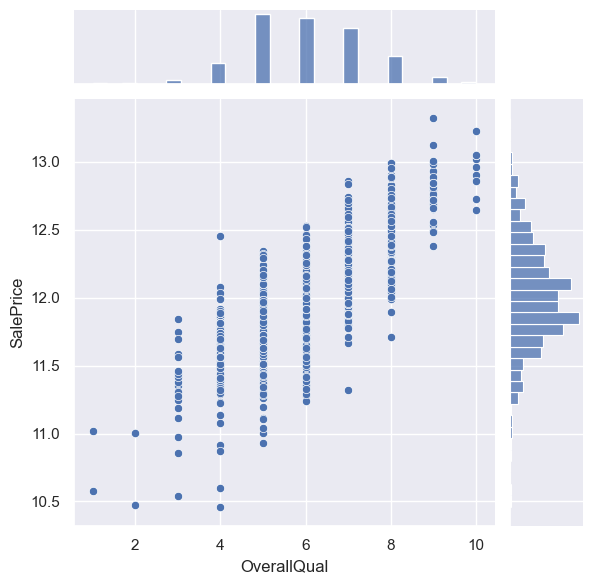

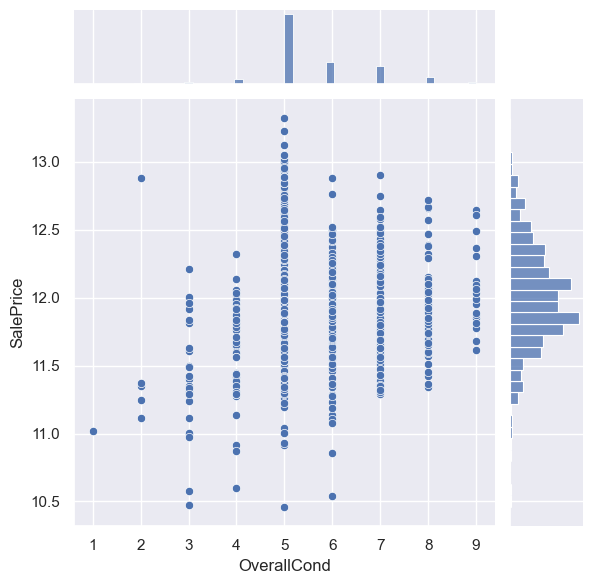

In [31]:
num_col_list = ["GrLivArea", "LotFrontage", "LotArea", "1stFlrSF", "2ndFlrSF", "OverallQual", "OverallCond"]
for cols in num_col_list:
    sns.jointplot(x=housing_orig_df[cols], y = housing_orig_df['SalePrice'])

**Interpretation:**
    
    0 second floor houses i.e. ground or 1st floor has steady increase in prices.

In [32]:
# Deriving new column defining age of property, using yearsold and yearbuilt columns
housing_orig_df['PropertyAge'] = (housing_orig_df['YrSold'] - housing_orig_df['YearBuilt'])
housing_orig_df.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave  none      Reg   
1   2          20       RL         80.0     9600   Pave  none      Reg   
2   3          60       RL         68.0    11250   Pave  none      IR1   
3   4          70       RL         60.0     9550   Pave  none      IR1   
4   5          60       RL         84.0    14260   Pave  none      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd       None   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  TotalBsmtSF Heating  \
0          GLQ         706          Unf           0          856    GasA   
1          ALQ         978          Unf           0         1262    GasA   
2          GLQ         486          Unf           0          920    GasA   
3          ALQ         216          Unf           0          756    GasA   
4          GLQ         655          Unf           0         1145    GasA   

  HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0        Ex          Y      SBrkr       856       854             0   
1        Ex          Y      SBrkr      1262         0             0   
2        Ex          Y      SBrkr       920       866             0   
3        Gd          Y      SBrkr       961       756             0   
4        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual Functional  Fireplaces FireplaceQu GarageType  \
0             1          Gd        Typ           0        none     Attchd   
1             1          TA        Typ           1          TA     Attchd   
2             1          Gd        Typ           1          TA     Attchd   
3             1          Gd        Typ           1          Gd     Detchd   
4             1          Gd        Typ  

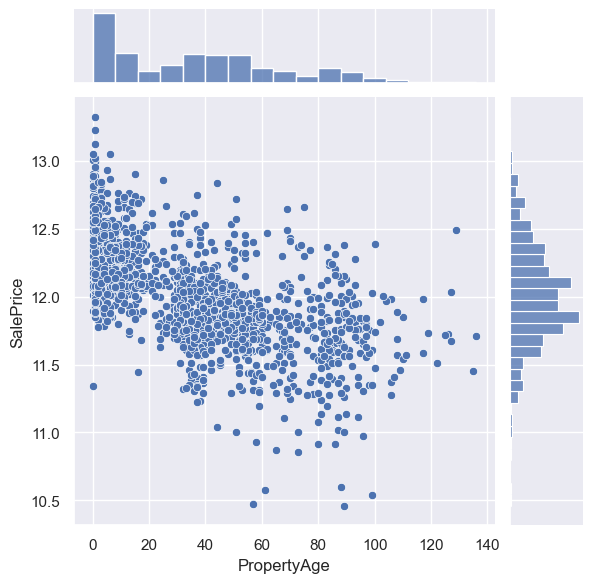

In [33]:
# Studying PropAge vs SalePrice data
sns.jointplot(x = housing_orig_df['PropertyAge'], y = housing_orig_df['SalePrice'])
plt.show()

**Interpretation:**

    -  Increase in property age decreases price of property
    -  New properties has higher prices of house

In [34]:
# Dropping not needed base columns wrt year built and sold
cols_date_drop = ["MoSold", "YrSold", "YearBuilt", "YearRemodAdd"]
for cols in cols_date_drop:
    housing_orig_df = housing_orig_df.drop([cols], axis = 1)
housing_orig_df.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave  none      Reg   
1   2          20       RL         80.0     9600   Pave  none      Reg   
2   3          60       RL         68.0    11250   Pave  none      IR1   
3   4          70       RL         60.0     9550   Pave  none      IR1   
4   5          60       RL         84.0    14260   Pave  none      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond RoofStyle RoofMatl  \
0       Norm     1Fam     2Story            7            5     Gable  CompShg   
1       Norm     1Fam     1Story            6            8     Gable  CompShg   
2       Norm     1Fam     2Story            7            5     Gable  CompShg   
3       Norm     1Fam     2Story            7            5     Gable  CompShg   
4       Norm     1Fam     2Story            8            5     Gable  CompShg   

  Exterior1st Exterior2nd MasVnrType  MasVnrArea ExterQual ExterCond  \
0     VinylSd     VinylSd    BrkFace       196.0        Gd        TA   
1     MetalSd     MetalSd       None         0.0        TA        TA   
2     VinylSd     VinylSd    BrkFace       162.0        Gd        TA   
3     Wd Sdng     Wd Shng       None         0.0        TA        TA   
4     VinylSd     VinylSd    BrkFace       350.0        Gd        TA   

  Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1  BsmtFinSF1  \
0      PConc       Gd       TA           No          GLQ         706   
1     CBlock       Gd       TA           Gd          ALQ         978   
2      PConc       Gd       TA           Mn          GLQ         486   
3     BrkTil       TA       Gd           No          ALQ         216   
4      PConc       Gd       TA           Av          GLQ         655   

  BsmtFinType2  BsmtFinSF2  TotalBsmtSF Heating HeatingQC CentralAir  \
0          Unf           0          856    GasA        Ex          Y   
1          Unf           0         1262    GasA        Ex          Y   
2          Unf           0          920    GasA        Ex          Y   
3          Unf           0          756    GasA        Gd          Y   
4          Unf           0         1145    GasA        Ex          Y   

  Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  \
0      SBrkr       856       854             0       1710             1   
1      SBrkr      1262         0             0       1262             0   
2      SBrkr       920       866             0       1786             1   
3      SBrkr       961       756             0       1717             1   
4      SBrkr      1145      1053             0       2198             1   

   BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr KitchenQual  \
0             0         2         1             3             1          Gd   
1             1         2         0             3             1          TA   
2             0         2         1             3             1          Gd   
3             0         1         0             3             1          Gd   
4             0         2         1             4             1          Gd   

  Functional  Fireplaces FireplaceQu GarageType GarageFinish  GarageArea  \
0        Typ           0        none     Attchd          RFn         548   
1        Typ           1          TA     Attchd          RFn         460   
2        Typ           1          TA     Attchd          RFn         608   
3        Typ           1          Gd     Detchd          Unf         642   
4        Typ           1          TA   

In [35]:
variance_data= housing_orig_df.select_dtypes(include=['float64', 'int64'])
variance_data

Id  MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  \
0        1          60         65.0     8450            7            5   
1        2          20         80.0     9600            6            8   
2        3          60         68.0    11250            7            5   
3        4          70         60.0     9550            7            5   
4        5          60         84.0    14260            8            5   
...    ...         ...          ...      ...          ...          ...   
1455  1456          60         62.0     7917            6            5   
1456  1457          20         85.0    13175            6            6   
1457  1458          70         66.0     9042            7            9   
1458  1459          20         68.0     9717            5            6   
1459  1460          20         75.0     9937            5            6   

      MasVnrArea  BsmtFinSF1  BsmtFinSF2  TotalBsmtSF  1stFlrSF  2ndFlrSF  \
0          196.0         706           0          856       856       854   
1            0.0         978           0         1262      1262         0   
2          162.0         486           0          920       920       866   
3            0.0         216           0          756       961       756   
4          350.0         655           0         1145      1145      1053   
...          ...         ...         ...          ...       ...       ...   
1455         0.0           0           0          953       953       694   
1456       119.0         790         163         1542      2073         0   
1457         0.0         275           0         1152      1188      1152   
1458         0.0          49        1029         1078      1078         0   
1459         0.0         830         290         1256      1256         0   

      LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  \
0                0       1710             1             0         2         1   
1                0       1262             0             1         2         0   
2                0       1786             1             0         2         1   
3                0       1717             1             0         1         0   
4                0       2198             1             0         2         1   
...            ...        ...           ...           ...       ...       ...   
1455             0       1647             0             0         2         1   
1456             0       2073             1             0         2         0   
1457             0       2340             0             0         2         0   
1458             0       1078             1             0         1         0   
1459             0       1256             1             0         1         1   

      BedroomAbvGr  KitchenAbvGr  Fireplaces  GarageArea  WoodDeckSF  \
0                3             1           0         548           0   
1                3             1           1         460         298   
2                3             1           1         608           0   
3                3             1           1         642           0   
4                4             1           1         836         192   
...            ...           ...         ...         ...         ...   
1455             3             1           1         460           0   
1456             3             1           2         500         349   
1457             4             1           2         252           0   
1458             2             1           0         240         366   
1459             3             1           0         276         736   

      OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  \
0              61              0          0            0         0        0   
1               0              0          0            0         0        0   
2              42              0          0            0         0        0   
3              35            272        

In [36]:
for i in variance_data:
    print(housing_orig_df[i].value_counts())

1       1
956     1
977     1
976     1
975     1
       ..
482     1
481     1
480     1
479     1
1460    1
Name: Id, Length: 1429, dtype: int64
20     534
60     283
50     139
120     87
30      69
160     63
70      59
80      57
90      52
190     29
85      20
45      12
75      11
180     10
40       4
Name: MSSubClass, dtype: int64
60.0     150
80.0     110
70.0      94
65.0      74
73.0      70
        ... 
33.0       1
150.0      1
38.0       1
111.0      1
46.0       1
Name: LotFrontage, Length: 112, dtype: int64
7200     25
9600     24
6000     17
8400     14
9000     14
         ..
10637     1
16033     1
11846     1
2500      1
9717      1
Name: LotArea, Length: 1047, dtype: int64
5     396
6     371
7     314
8     157
4     116
9      40
3      20
10     10
2       3
1       2
Name: OverallQual, dtype: int64
5    804
6    248
7    201
8     72
4     56
3     24
9     18
2      5
1      1
Name: OverallCond, dtype: int64
0.0      856
72.0       8
108.0      8
180.0      

In [37]:
housing_orig_df = housing_orig_df.drop(['PoolQC','MiscVal', 'Alley', 'RoofMatl', 'Condition2', 'Heating', 'GarageCond', 'Fence', 'Functional', "Utilities", 'Street' ], axis = 1)

Above Columns had high null values, some of which were imputed. After imputing, found out that there was very little variance in the data. Hence, dropped these columns.

In [38]:
housing_orig_df.shape

(1429, 63)

Data Preparation for model building

In [39]:
# Dropping ID column
housing_orig_df = housing_orig_df.drop(['Id'], axis=1)
#type of each feature in data: int, float, object
types = housing_orig_df.dtypes
#numerical values are either type int or float
numeric_type = types[(types == 'int64') | (types == float)] 
#categorical values are type object
categorical_type = types[types == object]

In [40]:
# Converting columns to list
# numeric columns
numerical_columns = list(numeric_type.index)
print(numerical_columns)
#Categorical columns
categorical_columns = list(categorical_type.index)
print(categorical_columns)

['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'Fireplaces', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'SalePrice', 'PropertyAge']
['MSZoning', 'LotShape', 'LandContour', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'BldgType', 'HouseStyle', 'RoofStyle', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'PavedDrive', 'MiscFeature', 'SaleType', 'SaleCondition']


Creating dummy columns to convert categorical to numeric columns

In [41]:
housing_orig_df = pd.get_dummies(housing_orig_df, drop_first=True )
housing_orig_df.head()

MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  MasVnrArea  \
0          60         65.0     8450            7            5       196.0   
1          20         80.0     9600            6            8         0.0   
2          60         68.0    11250            7            5       162.0   
3          70         60.0     9550            7            5         0.0   
4          60         84.0    14260            8            5       350.0   

   BsmtFinSF1  BsmtFinSF2  TotalBsmtSF  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0         706           0          856       856       854             0   
1         978           0         1262      1262         0             0   
2         486           0          920       920       866             0   
3         216           0          756       961       756             0   
4         655           0         1145      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr  Fireplaces  GarageArea  WoodDeckSF  OpenPorchSF  \
0             1           0         548           0           61   
1             1           1         460         298            0   
2             1           1         608           0           42   
3             1           1         642           0           35   
4             1           1         836         192           84   

   EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  SalePrice  PropertyAge  \
0              0          0            0         0  12.247699            5   
1              0          0            0         0  12.109016           31   
2              0          0            0         0  12.317171            7   
3            272          0            0         0  11.849405           91   
4              0          0            0         0  12.429220            8   

   MSZoning_FV  MSZoning_RH  MSZoning_RL  MSZoning_RM  LotShape_IR2  \
0            0            0            1            0             0   
1            0            0            1            0             0   
2            0            0            1            0             0   
3            0            0            1            0             0   
4            0            0            1            0             0   

   LotShape_IR3  LotShape_Reg  LandContour_HLS  LandContour_Low  \
0             0             1                0                0   
1             0             1                0                0   
2             0             0                0                0   
3             0             0                0                0   
4             0             0                0                0   

   LandContour_Lvl  LotConfig_CulDSac  LotConfig_FR2  LotConfig_FR3  \
0                1                  0              0              0   
1                1                  0              1              0   
2                1                  0              0              0   
3                1                  0              0              0   
4                1                  0              1              0   

   LotConfig_Inside  LandSlope_Mod  LandSlope_Sev  Neighborhood_Blueste  \
0                 1              0              0                     0   
1                 0              0              0                     0   
2                 1              0              0                     0   
3                 0              0              0                     0   
4                 0              0              0                     0   

   Neighborhood_BrDale  Neig

In [42]:
# creating x and y
x = housing_orig_df.drop(['SalePrice'], axis=1)
x.head()
# Putting response variable to y
y = housing_orig_df['SalePrice']
y.head()

0    12.247699
1    12.109016
2    12.317171
3    11.849405
4    12.429220
Name: SalePrice, dtype: float64

Creating train test split

In [43]:
X_train, X_test, y_train, y_test = train_test_split(x, y, train_size=0.7, test_size=0.3, random_state=50)

Scaling train test data for independent variables suing standardising

In [44]:
scaler = StandardScaler()
X_train[['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'Fireplaces', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'PropAge']] = scaler.fit_transform(X_train[['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'Fireplaces', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'PropertyAge']])
X_test[['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'Fireplaces', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'PropAge']] = scaler.fit_transform(X_test[['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'Fireplaces', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'PropertyAge']])


In [45]:
X_train.head()

MSSubClass  LotFrontage   LotArea  OverallQual  OverallCond  MasVnrArea  \
11      0.085645     0.746261  0.154684     2.241710    -0.513939    1.145212   
1070   -0.869945     0.130905 -0.020017    -0.764271    -0.513939    0.152993   
513    -0.869945     0.083570 -0.115156    -0.012775    -0.513939   -0.564274   
467     0.324542     0.462250 -0.086269    -0.764271     1.258264    0.774624   
993     0.085645    -0.058435 -0.148775    -0.012775    -0.513939   -0.564274   

      BsmtFinSF1  BsmtFinSF2  TotalBsmtSF  1stFlrSF  2ndFlrSF  LowQualFinSF  \
11      1.323938   -0.300737     0.345478  0.113320  1.995226     -0.111211   
1070    0.360916   -0.300737     0.030191 -0.267693 -0.769750     -0.111211   
513    -0.223442   -0.300737     0.119563 -0.176705 -0.769750     -0.111211   
467    -0.106571   -0.300737    -0.764234 -0.722635  1.060654     -0.111211   
993    -1.008820   -0.300737    -0.709617 -1.115022  1.046127     -0.111211   

      GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
11     1.923409      1.131973     -0.250936  2.754667 -0.727119      1.478865   
1070  -0.932170      1.131973     -0.250936 -0.990631 -0.727119      0.212713   
513   -0.860557     -0.816345     -0.250936 -0.990631  1.275964      0.212713   
467    0.401627     -0.816345     -0.250936 -0.990631  1.275964      0.212713   
993    0.079368     -0.816345     -0.250936  0.882018  1.275964      0.212713   

      KitchenAbvGr  Fireplaces  GarageArea  WoodDeckSF  OpenPorchSF  \
11       -0.222797    2.231812    1.267298    0.485675    -0.351334   
1070     -0.222797   -0.918240   -0.857140   -0.758474    -0.368801   
513      -0.222797   -0.918240    0.077613    0.257158    -0.718144   
467      -0.222797    2.231812   -0.734395    0.663411    -0.718144   
993      -0.222797   -0.918240    0.455291   -0.758474    -0.106794   

      EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  PropertyAge  \
11        -0.378185  -0.115383    -0.268919 -0.054574            1   
1070      -0.378185  -0.115383     3.351363 -0.054574           51   
513        2.265177  -0.115383    -0.268919 -0.054574           24   
467       -0.378185  -0.115383    -0.268919 -0.054574           65   
993       -0.378185  -0.115383    -0.268919 -0.054574            1   

      MSZoning_FV  MSZoning_RH  MSZoning_RL  MSZoning_RM  LotShape_IR2  \
11              0            0            1            0             0   
1070            0            0            1            0             0   
513             0            0            1            0             0   
467             0            0            1            0             0   
993             0            0            1            0             0   

      LotShape_IR3  LotShape_Reg  LandContour_HLS  LandContour_Low  \
11               0             0                0                0   
1070             0             1                0                0   
513              0             1                0                0   
467              0             1                0                0   
993              0             1                0                0   

      LandContour_Lvl  LotConfig_CulDSac  LotConfig_FR2  LotConfig_FR3  \
11                  1                  0              0              0   
1070                1                  0              0              0   
513                 0                  0              0              0   
467                 1                  0              0              0   
993                 1                  0              0              0   

      LotConfig_Inside  LandSlope_Mod  LandSlope_Sev  Neighborhood_Blueste  \
11                   1              0              0                     0   
1070                 1              0              0                     0   
513                  0              0              0                     0   
467                  1              0              0                     0   
993     

In [46]:
X_test.head()

MSSubClass  LotFrontage    LotArea  OverallQual  OverallCond  \
461     0.282163    -0.495702  -0.339155     0.620334     3.325664   
335     3.002345     0.729276  17.009026    -0.825989     0.435637   
200    -0.851246     0.484280  -0.190859    -1.549150    -0.527705   
214     0.055482    -0.005711   0.068493    -0.102827     1.398980   
1003    0.735527     0.484280   0.134598    -0.825989     0.435637   

      MasVnrArea  BsmtFinSF1  BsmtFinSF2  TotalBsmtSF  1stFlrSF  2ndFlrSF  \
461    -0.606456   -0.211663    0.997135    -1.205047 -1.556925  0.506037   
335    -0.606456    1.881258    0.620602     1.075768  1.258064 -0.435654   
200    -0.606456   -1.026482   -0.257974     0.157612 -0.084718 -0.835813   
214     0.272709   -0.146477   -0.257974    -0.891708 -1.249541  0.848688   
1003    0.335917   -1.026482   -0.257974     1.515413  1.422541 -0.835813   

      LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  \
461       -0.09698  -0.813247      1.073876     -0.215271 -1.099305 -0.803081   
335       -0.09698   0.616745      2.969732     -0.215271  0.802316 -0.803081   
200       -0.09698  -0.843999     -0.821980     -0.215271  0.802316 -0.803081   
214       -0.09698  -0.248718     -0.821980     -0.215271 -1.099305  1.176929   
1003      -0.09698   0.383905     -0.821980     -0.215271  0.802316 -0.803081   

      BedroomAbvGr  KitchenAbvGr  Fireplaces  GarageArea  WoodDeckSF  \
461       0.172438     -0.185172   -0.988037    0.530538    1.165362   
335       0.172438     -0.185172    2.151725    0.299231    4.227488   
200      -1.081391     -0.185172   -0.988037   -0.138775    0.248203   
214       0.172438     -0.185172   -0.988037   -0.832694   -0.728127   
1003      1.426267      4.779760   -0.988037    0.294310   -0.728127   

      OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  \
461     -0.747921      -0.328244  -0.127886     -0.27671       0.0   
335     -0.747921      -0.328244  -0.127886     -0.27671       0.0   
200      0.135073      -0.328244  -0.127886     -0.27671       0.0   
214     -0.251236      -0.328244  -0.127886     -0.27671       0.0   
1003    -0.747921      -0.328244  -0.127886     -0.27671       0.0   

      PropertyAge  MSZoning_FV  MSZoning_RH  MSZoning_RL  MSZoning_RM  \
461            73            0            0            1            0   
335            43            0            0            1            0   
200             7            0            0            0            1   
214            33            0            0            1            0   
1003           31            0            0            1            0   

      LotShape_IR2  LotShape_IR3  LotShape_Reg  LandContour_HLS  \
461              0             0             1                0   
335              0             0             0                1   
200              0             0             1                0   
214              0             0             0                0   
1003             0             0             0                0   

      LandContour_Low  LandContour_Lvl  LotConfig_CulDSac  LotConfig_FR2  \
461                 0                1                  0              0   
335                 0                0                  0              0   
200                 0                1                  0              0   
214                 0                1                  0              1   
1003                0                1                  0              0   

      LotConfig_FR3  LotConfig_Inside  LandSlope_Mod  LandSlope_Sev  \
461               0                 1              0              0   
335               0                 0              0              1   
200               0                 0              0              0   
214               0                 0              0              0   
1003              0                 0              0              0   

      Neighborhood_Blueste  Neighborhood_BrDale  Neighb

# Model building and evaluation

OPTION 1: Linear Regression and RFE

In [47]:
lm= LinearRegression()
lm.fit(X_train, y_train)
# Running RFE on top 100 features
rfe = RFE(lm, n_features_to_select = 100)
rfe.fit(X_train, y_train)

RFE(estimator=LinearRegression(), n_features_to_select=100)

In [48]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('MSSubClass', False, 36),
 ('LotFrontage', False, 78),
 ('LotArea', True, 1),
 ('OverallQual', True, 1),
 ('OverallCond', True, 1),
 ('MasVnrArea', False, 92),
 ('BsmtFinSF1', True, 1),
 ('BsmtFinSF2', False, 90),
 ('TotalBsmtSF', True, 1),
 ('1stFlrSF', True, 1),
 ('2ndFlrSF', True, 1),
 ('LowQualFinSF', True, 1),
 ('GrLivArea', True, 1),
 ('BsmtFullBath', False, 56),
 ('BsmtHalfBath', False, 106),
 ('FullBath', False, 61),
 ('HalfBath', False, 49),
 ('BedroomAbvGr', False, 104),
 ('KitchenAbvGr', False, 79),
 ('Fireplaces', False, 103),
 ('GarageArea', True, 1),
 ('WoodDeckSF', False, 54),
 ('OpenPorchSF', False, 108),
 ('EnclosedPorch', False, 75),
 ('3SsnPorch', False, 88),
 ('ScreenPorch', False, 59),
 ('PoolArea', False, 68),
 ('PropertyAge', False, 100),
 ('MSZoning_FV', True, 1),
 ('MSZoning_RH', True, 1),
 ('MSZoning_RL', True, 1),
 ('MSZoning_RM', True, 1),
 ('LotShape_IR2', False, 93),
 ('LotShape_IR3', False, 17),
 ('LotShape_Reg', False, 102),
 ('LandContour_HLS', True, 

In [49]:
cols = X_train.columns[rfe.support_]
cols

Index(['LotArea', 'OverallQual', 'OverallCond', 'BsmtFinSF1', 'TotalBsmtSF',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'GarageArea',
       'MSZoning_FV', 'MSZoning_RH', 'MSZoning_RL', 'MSZoning_RM',
       'LandContour_HLS', 'LotConfig_FR3', 'LotConfig_Inside', 'LandSlope_Sev',
       'Neighborhood_Blueste', 'Neighborhood_BrDale', 'Neighborhood_BrkSide',
       'Neighborhood_Edwards', 'Neighborhood_IDOTRR', 'Neighborhood_MeadowV',
       'Neighborhood_Mitchel', 'Neighborhood_NAmes', 'Neighborhood_NWAmes',
       'Neighborhood_OldTown', 'Neighborhood_SWISU', 'Neighborhood_Sawyer',
       'Neighborhood_SawyerW', 'Neighborhood_Somerst', 'Condition1_Feedr',
       'Condition1_Norm', 'Condition1_PosN', 'Condition1_RRAn',
       'Condition1_RRNe', 'Condition1_RRNn', 'BldgType_Twnhs',
       'HouseStyle_2.5Fin', 'RoofStyle_Gable', 'RoofStyle_Gambrel',
       'RoofStyle_Hip', 'RoofStyle_Mansard', 'Exterior1st_BrkComm',
       'Exterior1st_CBlock', 'Exterior1st_CemntBd', 'Ext

In [50]:
# Creating X_train dataset with RFE selected variables
X_train_rfe = X_train[cols]
X_train_rfe = pd.DataFrame(X_train[cols])
X_train_rfe.head()

LotArea  OverallQual  OverallCond  BsmtFinSF1  TotalBsmtSF  1stFlrSF  \
11    0.154684     2.241710    -0.513939    1.323938     0.345478  0.113320   
1070 -0.020017    -0.764271    -0.513939    0.360916     0.030191 -0.267693   
513  -0.115156    -0.012775    -0.513939   -0.223442     0.119563 -0.176705   
467  -0.086269    -0.764271     1.258264   -0.106571    -0.764234 -0.722635   
993  -0.148775    -0.012775    -0.513939   -1.008820    -0.709617 -1.115022   

      2ndFlrSF  LowQualFinSF  GrLivArea  GarageArea  MSZoning_FV  MSZoning_RH  \
11    1.995226     -0.111211   1.923409    1.267298            0            0   
1070 -0.769750     -0.111211  -0.932170   -0.857140            0            0   
513  -0.769750     -0.111211  -0.860557    0.077613            0            0   
467   1.060654     -0.111211   0.401627   -0.734395            0            0   
993   1.046127     -0.111211   0.079368    0.455291            0            0   

      MSZoning_RL  MSZoning_RM  LandContour_HLS  LotConfig_FR3  \
11              1            0                0              0   
1070            1            0                0              0   
513             1            0                0              0   
467             1            0                0              0   
993             1            0                0              0   

      LotConfig_Inside  LandSlope_Sev  Neighborhood_Blueste  \
11                   1              0                     0   
1070                 1              0                     0   
513                  0              0                     0   
467                  1              0                     0   
993                  1              0                     0   

      Neighborhood_BrDale  Neighborhood_BrkSide  Neighborhood_Edwards  \
11                      0                     0                     0   
1070                    0                     0                     0   
513                     0                     0                     0   
467                     0                     0                     0   
993                     0                     0                     0   

      Neighborhood_IDOTRR  Neighborhood_MeadowV  Neighborhood_Mitchel  \
11                      0                     0                     0   
1070                    0                     0                     0   
513                     0                     0                     1   
467                     0                     0                     0   
993                     0                     0                     0   

      Neighborhood_NAmes  Neighborhood_NWAmes  Neighborhood_OldTown  \
11                     0                    0                     0   
1070                   1                    0                     0   
513                    0                    0                     0   
467                    1                    0                     0   
993                    0                    0                     0   

      Neighborhood_SWISU  Neighborhood_Sawyer  Neighborhood_SawyerW  \
11                     0                    0                     0   
1070                   0                    0                     0   
513                    0                    0                     0   
467                    0                    0                     0   
993                    0                    0                     0   

      Neighborhood_Somerst  Condition1_Feedr  Condition1_Norm  \
11                       0                 0                1   
1070                     0                 0                1   
513                      0                 0                1   
467                      0                 0                0   
993                      0                 0                1   

      Condition1_PosN  Condition1_RRAn  Condition1_RRNe  Condition1_RRNn  \
11                  0                0                0               

In [51]:
X_train_rfe.shape

(1000, 100)

In [52]:
# predict
y_train_pred = lm.predict(X_train)
metrics.r2_score(y_true=y_train, y_pred=y_train_pred)

0.9397594626072182

In [53]:
y_test_pred = lm.predict(X_test)
metrics.r2_score(y_true=y_test, y_pred=y_test_pred)

0.9055588995464524

**Interpretation:**
    
    - Test R2 is very low hence will be going ahead with Lasso and Ridge

In [54]:
# Check the ranks
list(zip(X_test.columns,rfe.support_,rfe.ranking_))
# Select the top 100 variables
cols_test = X_test.columns[rfe.support_]
cols_test
X_test_rfe = X_test[cols_test]
X_test_rfe.head()

LotArea  OverallQual  OverallCond  BsmtFinSF1  TotalBsmtSF  1stFlrSF  \
461   -0.339155     0.620334     3.325664   -0.211663    -1.205047 -1.556925   
335   17.009026    -0.825989     0.435637    1.881258     1.075768  1.258064   
200   -0.190859    -1.549150    -0.527705   -1.026482     0.157612 -0.084718   
214    0.068493    -0.102827     1.398980   -0.146477    -0.891708 -1.249541   
1003   0.134598    -0.825989     0.435637   -1.026482     1.515413  1.422541   

      2ndFlrSF  LowQualFinSF  GrLivArea  GarageArea  MSZoning_FV  MSZoning_RH  \
461   0.506037      -0.09698  -0.813247    0.530538            0            0   
335  -0.435654      -0.09698   0.616745    0.299231            0            0   
200  -0.835813      -0.09698  -0.843999   -0.138775            0            0   
214   0.848688      -0.09698  -0.248718   -0.832694            0            0   
1003 -0.835813      -0.09698   0.383905    0.294310            0            0   

      MSZoning_RL  MSZoning_RM  LandContour_HLS  LotConfig_FR3  \
461             1            0                0              0   
335             1            0                1              0   
200             0            1                0              0   
214             1            0                0              0   
1003            1            0                0              0   

      LotConfig_Inside  LandSlope_Sev  Neighborhood_Blueste  \
461                  1              0                     0   
335                  0              1                     0   
200                  0              0                     0   
214                  0              0                     0   
1003                 0              0                     0   

      Neighborhood_BrDale  Neighborhood_BrkSide  Neighborhood_Edwards  \
461                     0                     0                     0   
335                     0                     0                     0   
200                     0                     0                     1   
214                     0                     0                     0   
1003                    0                     0                     0   

      Neighborhood_IDOTRR  Neighborhood_MeadowV  Neighborhood_Mitchel  \
461                     0                     0                     0   
335                     0                     0                     0   
200                     0                     0                     0   
214                     0                     0                     0   
1003                    0                     0                     0   

      Neighborhood_NAmes  Neighborhood_NWAmes  Neighborhood_OldTown  \
461                    0                    0                     0   
335                    0                    0                     0   
200                    0                    0                     0   
214                    0                    0                     0   
1003                   0                    1                     0   

      Neighborhood_SWISU  Neighborhood_Sawyer  Neighborhood_SawyerW  \
461                    1                    0                     0   
335                    0                    0                     0   
200                    0                    0                     0   
214                    0                    0                     0   
1003                   0                    0                     0   

      Neighborhood_Somerst  Condition1_Feedr  Condition1_Norm  \
461                      0                 1                0   
335                      0                 0                1   
200                      0                 0                1   
214                      0                 0                1   
1003                     0                 1                0   

      Condition1_PosN  Condition1_RRAn  Condition1_RRNe  Condition1_RRNn  \
461                 0                0                0          

# Lasso and Ridge Regression

In [55]:
# Checking the dimension of X_train & y_train
print("X_train", X_train.shape)
print("y_train", y_train.shape)

X_train (1000, 211)
y_train (1000,)


In [56]:
# Applying Lasso

# list of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}
lasso = Lasso()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [57]:
# cv_results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=1]
cv_results.head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_alpha  \
0       0.037731      0.001591         0.002392        0.000488      0.0001   
1       0.009597      0.001338         0.001841        0.000304       0.001   
2       0.004923      0.000511         0.001838        0.000429        0.01   
3       0.004440      0.000457         0.001994        0.000004        0.05   
4       0.004585      0.000489         0.001778        0.000392         0.1   

              params  split0_test_score  split1_test_score  split2_test_score  \
0  {'alpha': 0.0001}          -0.089748          -0.078789          -0.088396   
1   {'alpha': 0.001}          -0.082670          -0.083102          -0.087939   
2    {'alpha': 0.01}          -0.089572          -0.093066          -0.097644   
3    {'alpha': 0.05}          -0.129535          -0.108978          -0.129770   
4     {'alpha': 0.1}          -0.179056          -0.144485          -0.168942   

   split3_test_score  split4_test_score  mean_test_score  std_test_score  \
0          -0.085764          -0.077127        -0.083965        0.005096   
1          -0.082521          -0.079298        -0.083106        0.002771   
2          -0.090346          -0.088389        -0.091803        0.003300   
3          -0.112486          -0.112591        -0.118672        0.009060   
4          -0.153198          -0.153710        -0.159878        0.012406   

   rank_test_score  split0_train_score  split1_train_score  \
0                2           -0.065791           -0.068091   
1                1           -0.075344           -0.076886   
2                3           -0.090686           -0.090070   
3                4           -0.117097           -0.117678   
4                5           -0.158600           -0.160937   

   split2_train_score  split3_train_score  split4_train_score  \
0           -0.065342           -0.066303           -0.067598   
1           -0.074161           -0.076360           -0.076067   
2           -0.088256           -0.090145           -0.090677   
3           -0.116639           -0.118218           -0.117722   
4           -0.156852           -0.158981           -0.161126   

   mean_train_score  std_train_score  
0         -0.066625         0.001053  
1         -0.075764         0.000944  
2         -0.089967         0.000893  
3         -0.117471         0.000547  
4         -0.159299         0.001587

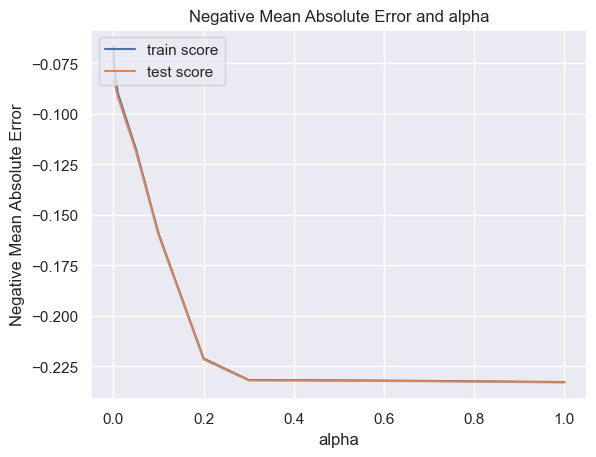

In [58]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

**Interpretation:**
    
    -  Negative Mean Absolute Error is low at alpha = 0.4 and stabilises thereafter, but will choose a low value of alpha to balance the trade-off between Bias-Variance and to get the coefficients of smallest of features.

In [59]:
# At alpha = 0.01, even the smallest of negative coefficients that have some predictive power towards 'SalePrice' 
# have been generated

alpha = 0.01
lasso = Lasso(alpha=alpha)

lasso.fit(X_train, y_train)
lasso.coef_

array([-8.36547597e-03,  1.34230978e-02,  1.57977071e-02,  1.01844364e-01,
        5.63299970e-02,  0.00000000e+00,  3.24931188e-02,  0.00000000e+00,
        4.12039767e-02,  1.19117765e-04,  0.00000000e+00, -0.00000000e+00,
        1.29065486e-01,  9.70855993e-03,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00, -0.00000000e+00, -6.54573838e-03,  2.51708088e-02,
        3.01198566e-02,  7.52335474e-03,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  6.07271474e-03,  0.00000000e+00, -3.89138519e-03,
        0.00000000e+00, -0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
        0.00000000e+00, -0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
        0.00000000e+00, -0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00, -

**Interpretation:** Lasso brings the coefficients of insignificant features to zero

In [60]:
# lasso model parameters
model_parameters = list(lasso.coef_ )
model_parameters.insert(0, lasso.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = X_train.columns
cols = cols.insert(0, "constant")
list(zip(cols, model_parameters))

[('constant', 12.145),
 ('MSSubClass', -0.008),
 ('LotFrontage', 0.013),
 ('LotArea', 0.016),
 ('OverallQual', 0.102),
 ('OverallCond', 0.056),
 ('MasVnrArea', 0.0),
 ('BsmtFinSF1', 0.032),
 ('BsmtFinSF2', 0.0),
 ('TotalBsmtSF', 0.041),
 ('1stFlrSF', 0.0),
 ('2ndFlrSF', 0.0),
 ('LowQualFinSF', -0.0),
 ('GrLivArea', 0.129),
 ('BsmtFullBath', 0.01),
 ('BsmtHalfBath', 0.0),
 ('FullBath', 0.0),
 ('HalfBath', 0.0),
 ('BedroomAbvGr', -0.0),
 ('KitchenAbvGr', -0.007),
 ('Fireplaces', 0.025),
 ('GarageArea', 0.03),
 ('WoodDeckSF', 0.008),
 ('OpenPorchSF', 0.0),
 ('EnclosedPorch', 0.0),
 ('3SsnPorch', 0.0),
 ('ScreenPorch', 0.006),
 ('PoolArea', 0.0),
 ('PropertyAge', -0.004),
 ('MSZoning_FV', 0.0),
 ('MSZoning_RH', -0.0),
 ('MSZoning_RL', 0.0),
 ('MSZoning_RM', -0.0),
 ('LotShape_IR2', 0.0),
 ('LotShape_IR3', -0.0),
 ('LotShape_Reg', -0.0),
 ('LandContour_HLS', 0.0),
 ('LandContour_Low', 0.0),
 ('LandContour_Lvl', -0.0),
 ('LotConfig_CulDSac', 0.0),
 ('LotConfig_FR2', 0.0),
 ('LotConfig_FR3', 

In [61]:
# lasso regression
lm = Lasso(alpha=0.01)
lm.fit(X_train, y_train)

# prediction on the test set(Using R2)
y_train_pred = lm.predict(X_train)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))
y_test_pred = lm.predict(X_test)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

0.8852986602638322
0.8937853852569423


**Interpretation:** R2 value of  train and test matches well. Hence, model looks optimal.

Calculating RMSE

In [62]:
print('RMSE :', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

RMSE : 0.12325158400977712


In [63]:
# Creating a dataframe for the coefficients obtained from Lasso
mod = list(zip(cols, model_parameters))
para = pd.DataFrame(mod)
para.columns = ['Variable', 'Coeff']
para.head()

Variable   Coeff
0     constant  12.145
1   MSSubClass  -0.008
2  LotFrontage   0.013
3      LotArea   0.016
4  OverallQual   0.102

In [64]:
# sorting coefficients in ascending order
para = para.sort_values((['Coeff']), axis = 0, ascending = False)
# Choosing coefficients that are non-zero
pred = pd.DataFrame(para[(para['Coeff'] != 0)])
pred

Variable   Coeff
0       constant  12.145
13     GrLivArea   0.129
4    OverallQual   0.102
5    OverallCond   0.056
9    TotalBsmtSF   0.041
7     BsmtFinSF1   0.032
21    GarageArea   0.030
20    Fireplaces   0.025
3        LotArea   0.016
2    LotFrontage   0.013
14  BsmtFullBath   0.010
22    WoodDeckSF   0.008
26   ScreenPorch   0.006
28   PropertyAge  -0.004
19  KitchenAbvGr  -0.007
1     MSSubClass  -0.008

In [65]:
pred.shape

(16, 2)

**Interpretation:** Above variables can be concluded to have strong impact on SalePrice

In [66]:
Lassso_var = list(pred['Variable'])
print(Lassso_var)
X_train_lasso = X_train[['GrLivArea', 'OverallQual', 'OverallCond', 'TotalBsmtSF', 'GarageArea', 'BsmtFinSF1', 'Fireplaces', 'LotArea', 'LotFrontage', 'BsmtFullBath', 'Foundation_PConc', 'OpenPorchSF', 'FullBath', 'ScreenPorch', 'WoodDeckSF']]
                        
X_train_lasso.head()

['constant', 'GrLivArea', 'OverallQual', 'OverallCond', 'TotalBsmtSF', 'BsmtFinSF1', 'GarageArea', 'Fireplaces', 'LotArea', 'LotFrontage', 'BsmtFullBath', 'WoodDeckSF', 'ScreenPorch', 'PropertyAge', 'KitchenAbvGr', 'MSSubClass']


GrLivArea  OverallQual  OverallCond  TotalBsmtSF  GarageArea  \
11     1.923409     2.241710    -0.513939     0.345478    1.267298   
1070  -0.932170    -0.764271    -0.513939     0.030191   -0.857140   
513   -0.860557    -0.012775    -0.513939     0.119563    0.077613   
467    0.401627    -0.764271     1.258264    -0.764234   -0.734395   
993    0.079368    -0.012775    -0.513939    -0.709617    0.455291   

      BsmtFinSF1  Fireplaces   LotArea  LotFrontage  BsmtFullBath  \
11      1.323938    2.231812  0.154684     0.746261      1.131973   
1070    0.360916   -0.918240 -0.020017     0.130905      1.131973   
513    -0.223442   -0.918240 -0.115156     0.083570     -0.816345   
467    -0.106571    2.231812 -0.086269     0.462250     -0.816345   
993    -1.008820   -0.918240 -0.148775    -0.058435     -0.816345   

      Foundation_PConc  OpenPorchSF  FullBath  ScreenPorch  WoodDeckSF  
11                   1    -0.351334  2.754667    -0.268919    0.485675  
1070                 0    -0.368801 -0.990631     3.351363   -0.758474  
513                  1    -0.718144 -0.990631    -0.268919    0.257158  
467                  0    -0.718144 -0.990631    -0.268919    0.663411  
993                  1    -0.106794  0.882018    -0.268919   -0.758474

In [67]:
X_train_lasso.shape

(1000, 15)

In [68]:
X_test_lasso = X_test[['GrLivArea', 'OverallQual', 'OverallCond', 'TotalBsmtSF', 'GarageArea', 'BsmtFinSF1', 'Fireplaces', 'LotArea', 'LotFrontage', 'BsmtFullBath', 'Foundation_PConc', 'OpenPorchSF', 'FullBath', 'ScreenPorch', 'WoodDeckSF']]
                        
X_test_lasso.head()

GrLivArea  OverallQual  OverallCond  TotalBsmtSF  GarageArea  \
461   -0.813247     0.620334     3.325664    -1.205047    0.530538   
335    0.616745    -0.825989     0.435637     1.075768    0.299231   
200   -0.843999    -1.549150    -0.527705     0.157612   -0.138775   
214   -0.248718    -0.102827     1.398980    -0.891708   -0.832694   
1003   0.383905    -0.825989     0.435637     1.515413    0.294310   

      BsmtFinSF1  Fireplaces    LotArea  LotFrontage  BsmtFullBath  \
461    -0.211663   -0.988037  -0.339155    -0.495702      1.073876   
335     1.881258    2.151725  17.009026     0.729276      2.969732   
200    -1.026482   -0.988037  -0.190859     0.484280     -0.821980   
214    -0.146477   -0.988037   0.068493    -0.005711     -0.821980   
1003   -1.026482   -0.988037   0.134598     0.484280     -0.821980   

      Foundation_PConc  OpenPorchSF  FullBath  ScreenPorch  WoodDeckSF  
461                  1    -0.747921 -1.099305     -0.27671    1.165362  
335                  0    -0.747921  0.802316     -0.27671    4.227488  
200                  1     0.135073  0.802316     -0.27671    0.248203  
214                  0    -0.251236 -1.099305     -0.27671   -0.728127  
1003                 0    -0.747921  0.802316     -0.27671   -0.728127

# Ridge Regression

In [69]:
# list of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}


ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [70]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=5]
cv_results.head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_alpha  \
0       0.005183      0.000746         0.002469        0.000750      0.0001   
1       0.005847      0.000828         0.002192        0.000399       0.001   
2       0.005058      0.001219         0.002220        0.000389        0.01   
3       0.004405      0.000511         0.001793        0.000399        0.05   
4       0.005005      0.000701         0.002034        0.000087         0.1   

              params  split0_test_score  split1_test_score  split2_test_score  \
0  {'alpha': 0.0001}          -0.098827          -0.080586          -0.093923   
1   {'alpha': 0.001}          -0.098810          -0.080580          -0.093891   
2    {'alpha': 0.01}          -0.098639          -0.080523          -0.093591   
3    {'alpha': 0.05}          -0.097947          -0.080313          -0.092584   
4     {'alpha': 0.1}          -0.097203          -0.080128          -0.091737   

   split3_test_score  split4_test_score  mean_test_score  std_test_score  \
0          -0.093385          -0.081908        -0.089726        0.007190   
1          -0.093357          -0.081877        -0.089703        0.007188   
2          -0.093089          -0.081615        -0.089491        0.007154   
3          -0.092083          -0.081128        -0.088811        0.006923   
4          -0.091160          -0.080828        -0.088211        0.006661   

   rank_test_score  split0_train_score  split1_train_score  \
0               26           -0.063890           -0.066811   
1               25           -0.063891           -0.066811   
2               24           -0.063904           -0.066811   
3               23           -0.063979           -0.066830   
4               22           -0.064087           -0.066874   

   split2_train_score  split3_train_score  split4_train_score  \
0           -0.062901           -0.064702           -0.065821   
1           -0.062903           -0.064704           -0.065823   
2           -0.062931           -0.064715           -0.065846   
3           -0.063098           -0.064761           -0.065935   
4           -0.063300           -0.064817           -0.066042   

   mean_train_score  std_train_score  
0         -0.064825         0.001380  
1         -0.064826         0.001380  
2         -0.064841         0.001374  
3         -0.064921         0.001335  
4         -0.065024         0.001293

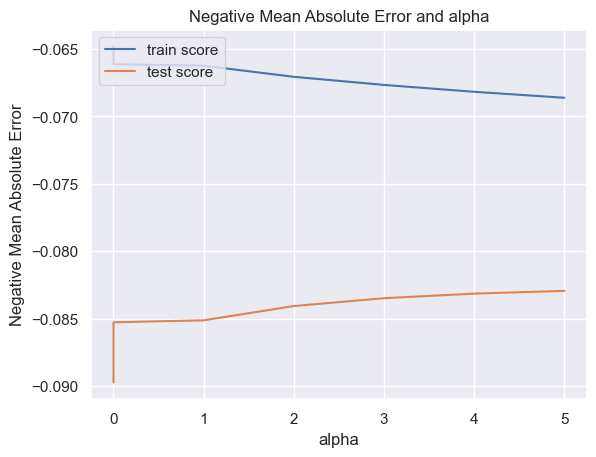

In [71]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

Since Negative Mean Absolute Error stabilised at alpha = 2, will choose this for further analysis

In [72]:
alpha = 2
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
ridge.coef_

array([-1.65841642e-02,  8.83598248e-03,  2.53949508e-02,  6.43686117e-02,
        5.14617149e-02, -1.66657649e-03,  3.05420716e-02,  7.50329812e-03,
        3.63613279e-02,  4.00498098e-02,  4.77108203e-02,  5.24793911e-03,
        7.60926819e-02,  1.17113572e-02, -9.10872532e-04,  8.80535240e-03,
        1.23776072e-02,  3.54007430e-04, -5.27648848e-03,  3.53695975e-03,
        2.07059841e-02,  1.34766256e-02, -1.02867962e-03,  1.24263993e-02,
        4.90865198e-03,  1.41631349e-02,  9.70595890e-03, -2.38013261e-03,
        1.48370386e-01,  1.05028694e-01,  1.24895948e-01,  9.68765736e-02,
        2.13215567e-03, -2.10043554e-02,  3.48828718e-04,  1.22052510e-02,
       -2.07187254e-02,  2.99199904e-03,  1.73986831e-02, -2.14615897e-02,
       -5.11727195e-02, -2.40173566e-02,  1.02599075e-02, -3.89229292e-02,
       -1.49266531e-02, -2.33287960e-02,  9.94570804e-03,  3.71198794e-02,
       -8.01448856e-03,  1.14551983e-01, -5.58115908e-02, -1.01494591e-02,
       -8.53782661e-02, -

In [73]:
# ridge model parameters
model_parameters = list(ridge.coef_)
model_parameters.insert(0, ridge.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = X_train.columns
cols = cols.insert(0, "constant")
list(zip(cols, model_parameters))

[('constant', 11.83),
 ('MSSubClass', -0.017),
 ('LotFrontage', 0.009),
 ('LotArea', 0.025),
 ('OverallQual', 0.064),
 ('OverallCond', 0.051),
 ('MasVnrArea', -0.002),
 ('BsmtFinSF1', 0.031),
 ('BsmtFinSF2', 0.008),
 ('TotalBsmtSF', 0.036),
 ('1stFlrSF', 0.04),
 ('2ndFlrSF', 0.048),
 ('LowQualFinSF', 0.005),
 ('GrLivArea', 0.076),
 ('BsmtFullBath', 0.012),
 ('BsmtHalfBath', -0.001),
 ('FullBath', 0.009),
 ('HalfBath', 0.012),
 ('BedroomAbvGr', 0.0),
 ('KitchenAbvGr', -0.005),
 ('Fireplaces', 0.004),
 ('GarageArea', 0.021),
 ('WoodDeckSF', 0.013),
 ('OpenPorchSF', -0.001),
 ('EnclosedPorch', 0.012),
 ('3SsnPorch', 0.005),
 ('ScreenPorch', 0.014),
 ('PoolArea', 0.01),
 ('PropertyAge', -0.002),
 ('MSZoning_FV', 0.148),
 ('MSZoning_RH', 0.105),
 ('MSZoning_RL', 0.125),
 ('MSZoning_RM', 0.097),
 ('LotShape_IR2', 0.002),
 ('LotShape_IR3', -0.021),
 ('LotShape_Reg', 0.0),
 ('LandContour_HLS', 0.012),
 ('LandContour_Low', -0.021),
 ('LandContour_Lvl', 0.003),
 ('LotConfig_CulDSac', 0.017),
 ('

In [74]:
# ridge regression
lm = Ridge(alpha=2)
lm.fit(X_train, y_train)

# predict
y_train_pred = lm.predict(X_train)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))
y_test_pred = lm.predict(X_test)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

0.93645474997655
0.9106281303179837


In [75]:
print('RMSE :', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

RMSE : 0.11305786818560676


**Interpretation:** Model performance is bettwer in Ridge as compared to lasso

In [76]:
# Create a dataframe for Ridge Coefficients
mod_ridge = list(zip(cols, model_parameters))
paraRFE = pd.DataFrame(mod_ridge)
paraRFE.columns = ['Variable', 'Coeff']
res=paraRFE.sort_values(by=['Coeff'], ascending = False)
# sorting
paraRFE = paraRFE.sort_values((['Coeff']), axis = 0, ascending = False)
## since there were few coefficients at 0, removed them from features
predRFE = pd.DataFrame(paraRFE[(paraRFE['Coeff'] != 0)])
print(predRFE)
print(predRFE.shape)

                 Variable   Coeff
0                constant  11.830
29            MSZoning_FV   0.148
31            MSZoning_RL   0.125
50   Neighborhood_Crawfor   0.115
30            MSZoning_RH   0.105
..                    ...     ...
173        KitchenQual_TA  -0.080
53    Neighborhood_IDOTRR  -0.085
94    Exterior1st_BrkComm  -0.096
83      HouseStyle_2.5Fin  -0.099
54   Neighborhood_MeadowV  -0.112

[204 rows x 2 columns]
(204, 2)


**Interpretation:**
Model performance by Ridge Regression was better in terms of R2 values of Train and Test,
but it is better to use Lasso, since it brings and assigns a zero value to insignificant features, helping to choose predictive variables.
As it is always advised to use simple yet robust model.

Equation using lasso can be defined as:

In [77]:
pred.set_index(pd.Index(['C','x1', 'x2', 'x3', 'x4', 'x5' , 'x6', 'x7', 'x8', 'x9', 'x10', 'x11', 'x12', 'x13', 'x14', 'x15']), inplace = True) 
pred

Variable   Coeff
C        constant  12.145
x1      GrLivArea   0.129
x2    OverallQual   0.102
x3    OverallCond   0.056
x4    TotalBsmtSF   0.041
x5     BsmtFinSF1   0.032
x6     GarageArea   0.030
x7     Fireplaces   0.025
x8        LotArea   0.016
x9    LotFrontage   0.013
x10  BsmtFullBath   0.010
x11    WoodDeckSF   0.008
x12   ScreenPorch   0.006
x13   PropertyAge  -0.004
x14  KitchenAbvGr  -0.007
x15    MSSubClass  -0.008

**Log(Y) = C + 0.129(x1) + 0.102(x2) + 0.056(x3) + 0.041(x4) + 0.032(x5) + 0.030(x6) + 0.025(x7) + 0.016(x8) + 0.013(x9) + 0.010(x10) + 0.008(x11) + 0.006(x12) - 0.004(x13) - 0.007(x14) - 0.008(x15) + Error term(RSS + alpha * (sum of absolute value of coefficients)**

**Inference:**
    
    -  Keeping check on these predictors affecting the price of the house
    -  Higher values of positive coeeficients suggest a high sale value.
        -  GrLivArea, OverallQual, OverallCond, TotalBsmtSF, BsmtFinSF1
    -  Higher values of negative coeeficients suggest a decrease in sale value.
        -  MSSubClass, PropertyAge and KitchenAbvGr
        
        
**Time to buy property: When the market value of the property is lower than the Predicted Sale Price**

# Changes done only to answer Assignment - Part II question
PS: Not included for Part - I of assignment

In [78]:
# Checking the dimension of X_train & y_train
print("X_train", X_train.shape)
print("y_train", y_train.shape)

X_train (1000, 211)
y_train (1000,)


In [79]:
# Applying Lasso

# list of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}
lasso = Lasso()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [80]:
# cv_results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=1]
cv_results.head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_alpha  \
0       0.049532      0.002314         0.002178        0.000407      0.0001   
1       0.011650      0.001704         0.002653        0.000423       0.001   
2       0.004930      0.000799         0.001790        0.000397        0.01   
3       0.005310      0.000854         0.002281        0.000373        0.05   
4       0.005510      0.000751         0.001998        0.000007         0.1   

              params  split0_test_score  split1_test_score  split2_test_score  \
0  {'alpha': 0.0001}          -0.089748          -0.078789          -0.088396   
1   {'alpha': 0.001}          -0.082670          -0.083102          -0.087939   
2    {'alpha': 0.01}          -0.089572          -0.093066          -0.097644   
3    {'alpha': 0.05}          -0.129535          -0.108978          -0.129770   
4     {'alpha': 0.1}          -0.179056          -0.144485          -0.168942   

   split3_test_score  split4_test_score  mean_test_score  std_test_score  \
0          -0.085764          -0.077127        -0.083965        0.005096   
1          -0.082521          -0.079298        -0.083106        0.002771   
2          -0.090346          -0.088389        -0.091803        0.003300   
3          -0.112486          -0.112591        -0.118672        0.009060   
4          -0.153198          -0.153710        -0.159878        0.012406   

   rank_test_score  split0_train_score  split1_train_score  \
0                2           -0.065791           -0.068091   
1                1           -0.075344           -0.076886   
2                3           -0.090686           -0.090070   
3                4           -0.117097           -0.117678   
4                5           -0.158600           -0.160937   

   split2_train_score  split3_train_score  split4_train_score  \
0           -0.065342           -0.066303           -0.067598   
1           -0.074161           -0.076360           -0.076067   
2           -0.088256           -0.090145           -0.090677   
3           -0.116639           -0.118218           -0.117722   
4           -0.156852           -0.158981           -0.161126   

   mean_train_score  std_train_score  
0         -0.066625         0.001053  
1         -0.075764         0.000944  
2         -0.089967         0.000893  
3         -0.117471         0.000547  
4         -0.159299         0.001587

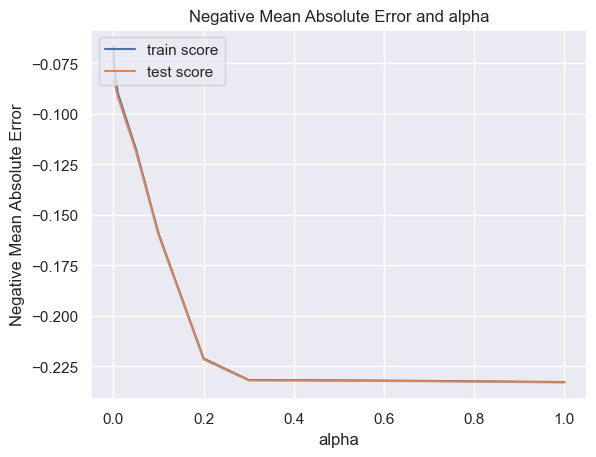

In [81]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [82]:
# At alpha = 0.01, even the smallest of negative coefficients that have some predictive power towards 'SalePrice' 
# have been generated

alpha = 0.02
lasso = Lasso(alpha=alpha)

lasso.fit(X_train, y_train)
lasso.coef_

array([-0.00151535,  0.01208168,  0.01125664,  0.09654272,  0.04794928,
        0.        ,  0.03163301,  0.        ,  0.04212169,  0.        ,
        0.        , -0.        ,  0.12346614,  0.00172844,  0.        ,
        0.        ,  0.        , -0.        , -0.        ,  0.0257586 ,
        0.02488612,  0.00073394,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        , -0.00413617,  0.        , -0.        ,
        0.        , -0.        ,  0.        , -0.        , -0.        ,
        0.        ,  0.        , -0.        ,  0.        ,  0.        ,
       -0.        , -0.        ,  0.        ,  0.        , -0.        ,
       -0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
       -0.        , -0.        , -0.        , -0.        , -0.        ,
        0.        , -0.        , -0.        ,  0.        ,  0.        ,
       -0.        ,  0.        , -0.        , -0.        ,  0.        ,
        0.        ,  0.        ,  0.        , -0.        ,  0.  

In [83]:
# lasso model parameters
model_parameters = list(lasso.coef_ )
model_parameters.insert(0, lasso.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = X_train.columns
cols = cols.insert(0, "constant")
list(zip(cols, model_parameters))

[('constant', 12.154),
 ('MSSubClass', -0.002),
 ('LotFrontage', 0.012),
 ('LotArea', 0.011),
 ('OverallQual', 0.097),
 ('OverallCond', 0.048),
 ('MasVnrArea', 0.0),
 ('BsmtFinSF1', 0.032),
 ('BsmtFinSF2', 0.0),
 ('TotalBsmtSF', 0.042),
 ('1stFlrSF', 0.0),
 ('2ndFlrSF', 0.0),
 ('LowQualFinSF', -0.0),
 ('GrLivArea', 0.123),
 ('BsmtFullBath', 0.002),
 ('BsmtHalfBath', 0.0),
 ('FullBath', 0.0),
 ('HalfBath', 0.0),
 ('BedroomAbvGr', -0.0),
 ('KitchenAbvGr', -0.0),
 ('Fireplaces', 0.026),
 ('GarageArea', 0.025),
 ('WoodDeckSF', 0.001),
 ('OpenPorchSF', 0.0),
 ('EnclosedPorch', 0.0),
 ('3SsnPorch', 0.0),
 ('ScreenPorch', 0.0),
 ('PoolArea', 0.0),
 ('PropertyAge', -0.004),
 ('MSZoning_FV', 0.0),
 ('MSZoning_RH', -0.0),
 ('MSZoning_RL', 0.0),
 ('MSZoning_RM', -0.0),
 ('LotShape_IR2', 0.0),
 ('LotShape_IR3', -0.0),
 ('LotShape_Reg', -0.0),
 ('LandContour_HLS', 0.0),
 ('LandContour_Low', 0.0),
 ('LandContour_Lvl', -0.0),
 ('LotConfig_CulDSac', 0.0),
 ('LotConfig_FR2', 0.0),
 ('LotConfig_FR3', -0

In [84]:
# lasso regression
lm = Lasso(alpha=0.02)
lm.fit(X_train, y_train)

# prediction on the test set(Using R2)
y_train_pred = lm.predict(X_train)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))
y_test_pred = lm.predict(X_test)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

0.872579770020679
0.8860043810956246


In [85]:
print('RMSE :', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

RMSE : 0.12768634359747102


In [86]:
# Creating a dataframe for the coefficients obtained from Lasso
mod = list(zip(cols, model_parameters))
para = pd.DataFrame(mod)
para.columns = ['Variable', 'Coeff']
para.head()

Variable   Coeff
0     constant  12.154
1   MSSubClass  -0.002
2  LotFrontage   0.012
3      LotArea   0.011
4  OverallQual   0.097

# Ridge Regression

In [87]:
# list of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}


ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [88]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=5]
cv_results.head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_alpha  \
0       0.005383      0.001015         0.002719        0.000390      0.0001   
1       0.005060      0.000216         0.001995        0.000003       0.001   
2       0.005108      0.000226         0.002121        0.000193        0.01   
3       0.005289      0.000718         0.002220        0.000391        0.05   
4       0.004464      0.000534         0.001576        0.000480         0.1   

              params  split0_test_score  split1_test_score  split2_test_score  \
0  {'alpha': 0.0001}          -0.098827          -0.080586          -0.093923   
1   {'alpha': 0.001}          -0.098810          -0.080580          -0.093891   
2    {'alpha': 0.01}          -0.098639          -0.080523          -0.093591   
3    {'alpha': 0.05}          -0.097947          -0.080313          -0.092584   
4     {'alpha': 0.1}          -0.097203          -0.080128          -0.091737   

   split3_test_score  split4_test_score  mean_test_score  std_test_score  \
0          -0.093385          -0.081908        -0.089726        0.007190   
1          -0.093357          -0.081877        -0.089703        0.007188   
2          -0.093089          -0.081615        -0.089491        0.007154   
3          -0.092083          -0.081128        -0.088811        0.006923   
4          -0.091160          -0.080828        -0.088211        0.006661   

   rank_test_score  split0_train_score  split1_train_score  \
0               26           -0.063890           -0.066811   
1               25           -0.063891           -0.066811   
2               24           -0.063904           -0.066811   
3               23           -0.063979           -0.066830   
4               22           -0.064087           -0.066874   

   split2_train_score  split3_train_score  split4_train_score  \
0           -0.062901           -0.064702           -0.065821   
1           -0.062903           -0.064704           -0.065823   
2           -0.062931           -0.064715           -0.065846   
3           -0.063098           -0.064761           -0.065935   
4           -0.063300           -0.064817           -0.066042   

   mean_train_score  std_train_score  
0         -0.064825         0.001380  
1         -0.064826         0.001380  
2         -0.064841         0.001374  
3         -0.064921         0.001335  
4         -0.065024         0.001293

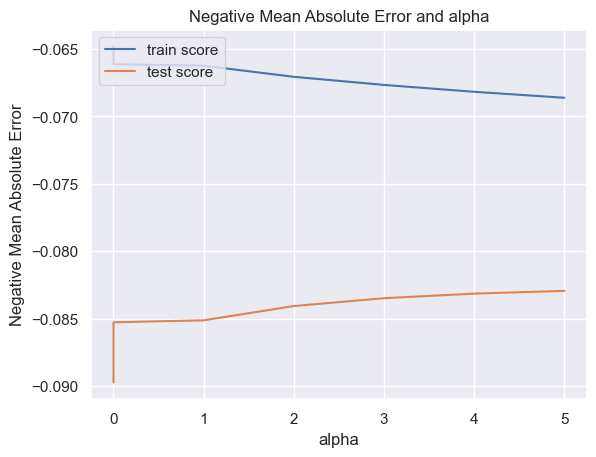

In [89]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [90]:
alpha = 4
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
ridge.coef_

array([-1.59012674e-02,  9.55776213e-03,  2.42501367e-02,  6.69962904e-02,
        5.28275780e-02, -8.05560048e-04,  3.10774858e-02,  8.05167391e-03,
        3.65892393e-02,  4.02261143e-02,  4.70193055e-02,  4.23130497e-03,
        7.55009448e-02,  1.20105772e-02, -1.01334240e-03,  9.31192124e-03,
        1.24120270e-02, -6.73773932e-05, -5.98278854e-03,  4.47569954e-03,
        2.07544809e-02,  1.33690643e-02, -1.25642847e-03,  1.24431105e-02,
        4.83422129e-03,  1.40713305e-02,  9.96401937e-03, -2.46268638e-03,
        9.89571982e-02,  6.29423854e-02,  8.72513247e-02,  5.35256630e-02,
        1.90968914e-03, -1.66209351e-02, -2.12036295e-04,  1.40513201e-02,
       -1.74106920e-02,  3.46202104e-03,  1.78979004e-02, -1.69168950e-02,
       -3.31467399e-02, -2.29723116e-02,  8.22851697e-03, -2.90224979e-02,
       -8.77437701e-03, -1.62343039e-02,  1.76792224e-02,  3.45950469e-02,
       -8.20672649e-03,  1.09041010e-01, -4.82621944e-02, -1.16240570e-02,
       -7.88856160e-02, -

In [91]:
# ridge model parameters
model_parameters = list(ridge.coef_)
model_parameters.insert(0, ridge.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = X_train.columns
cols = cols.insert(0, "constant")
list(zip(cols, model_parameters))

[('constant', 11.872),
 ('MSSubClass', -0.016),
 ('LotFrontage', 0.01),
 ('LotArea', 0.024),
 ('OverallQual', 0.067),
 ('OverallCond', 0.053),
 ('MasVnrArea', -0.001),
 ('BsmtFinSF1', 0.031),
 ('BsmtFinSF2', 0.008),
 ('TotalBsmtSF', 0.037),
 ('1stFlrSF', 0.04),
 ('2ndFlrSF', 0.047),
 ('LowQualFinSF', 0.004),
 ('GrLivArea', 0.076),
 ('BsmtFullBath', 0.012),
 ('BsmtHalfBath', -0.001),
 ('FullBath', 0.009),
 ('HalfBath', 0.012),
 ('BedroomAbvGr', -0.0),
 ('KitchenAbvGr', -0.006),
 ('Fireplaces', 0.004),
 ('GarageArea', 0.021),
 ('WoodDeckSF', 0.013),
 ('OpenPorchSF', -0.001),
 ('EnclosedPorch', 0.012),
 ('3SsnPorch', 0.005),
 ('ScreenPorch', 0.014),
 ('PoolArea', 0.01),
 ('PropertyAge', -0.002),
 ('MSZoning_FV', 0.099),
 ('MSZoning_RH', 0.063),
 ('MSZoning_RL', 0.087),
 ('MSZoning_RM', 0.054),
 ('LotShape_IR2', 0.002),
 ('LotShape_IR3', -0.017),
 ('LotShape_Reg', -0.0),
 ('LandContour_HLS', 0.014),
 ('LandContour_Low', -0.017),
 ('LandContour_Lvl', 0.003),
 ('LotConfig_CulDSac', 0.018),
 

In [92]:
# ridge regression
lm = Ridge(alpha=4)
lm.fit(X_train, y_train)

# predict
y_train_pred = lm.predict(X_train)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))
y_test_pred = lm.predict(X_test)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

0.9344199705980808
0.9115470020911319


In [93]:
print('RMSE :', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

RMSE : 0.1124751675582237
